# Hypothesis test

**Law of Large Numbers**
- The strong law of large numbers describes how a sample statistic converges on the population value as the sample size or the number of trials increases. For example, the sample mean will converge on the population mean as the sample size increases. The strong law of large numbers is also known as Kolmogorov’s strong law.
- The Law of Large Numbers says that as our sample size increases, the sample mean gets closer to the population's mean

In [5]:
import numpy as np
np.random.seed(42)

pop_data = np.random.gamma(1,100,3000) #consider this as population
plt.hist(pop_data);

NameError: name 'plt' is not defined

In [5]:
# What is the population mean?
np.mean(pop_data)

100.35978700795846

In [6]:
#Use numpy's random.choice to simulate 5 draws from the pop_data array
sample = np.random.choice(pop_data, 5)
print(sample)

print('sample mean is', np.mean(sample))

#Use numpy's random.choice to simulate 20 draws from the pop_data array
sample2 = np.random.choice(pop_data, 20)
print(sample2)
print('sample mean is', np.mean(sample2))

#Use numpy's random.choice to simulate 50 draws from the pop_data array
sample3 = np.random.choice(pop_data, 50)

print('sample mean is', np.mean(sample3))

[  1.99073813   2.56776095 100.03907725  26.44660917   7.38496269]
sample mean is 27.685829640608965
[150.12425405 227.09741251   3.16290491 428.38655756  87.55537772
 265.49500859 119.16779497  59.13481289 158.08374881 356.77981383
 431.47510845 270.19418338  47.23477616  44.66526676  15.95263842
 106.31988723 386.82424166  27.20486222  62.10553019  20.43885995]
sample mean is 163.3701520126447
sample mean is 116.81601122339083


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

# Central limit theorem 
1. If you pick up n data as a sample, calculate the sample mean, and repeat this procedure many times to obtain the distribution of the sample mean, this distribution is described by the normal distribution. Here, n is the positive integer which is sufficiently large. The central limit theorem is valid only when n is large.
2. In an ideal case, the sample mean is the same as the population mean.
3. In reality, small difference between the sample mean and population mean might be expected. However, since the distribution of the sample mean is the normal distribution (mean = μ, variance: σ2/n), it is possible to evaluate the confidence interval.


- If the original population is normally distributed, then the SDSM will also be normally distributed, regardless of the sample size n that we use.
- If the original population is not normally distributed, or if we don’t know the shape of the population distribution, then the SDSM is only guaranteed to be normally distributed when we use a sample size of at least n = 30.

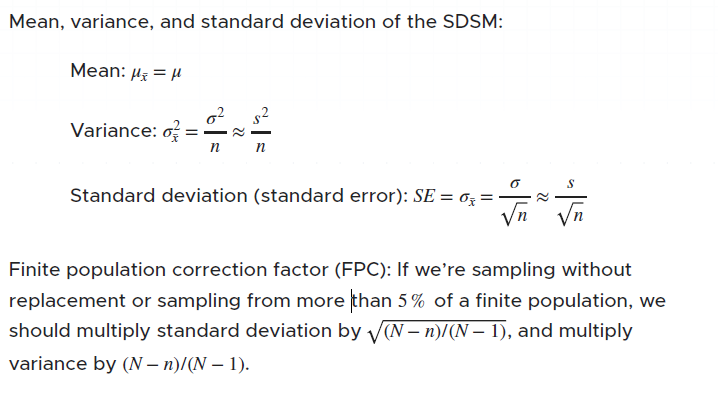

**Conditions for inference with the SDSM**
- In order to use the sampling distribution of the sample mean, we need to meet the random, normal, and independent conditions. 
- We meet the normal condition if the original population is normal, and/or when n ≥ 30. 
- We meet the independent condition if we sample with replacement, and/or if we keep our sample size to 10% or less of the total population.

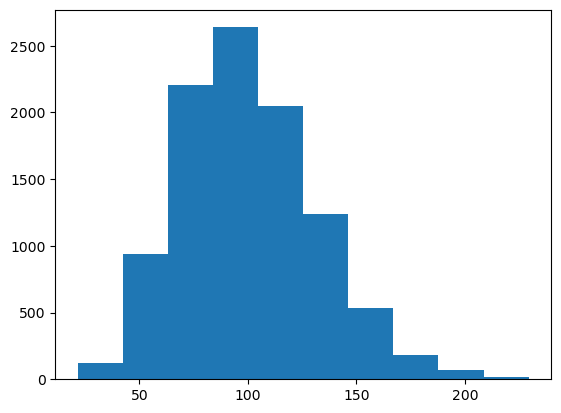

In [8]:
#Write a loop to simulate this process 10,000 times, and store each mean into an array called means_size_10
means_size_100 = []
for _ in range(10000):
    sample = np.random.choice(pop_data, 10) #Use numpy's random.choice to simulate 10 draws(sample size) from the pop_data array
    means_size_100.append(sample.mean()) #Compute the mean of these 100 draws
    
plt.hist(means_size_100);

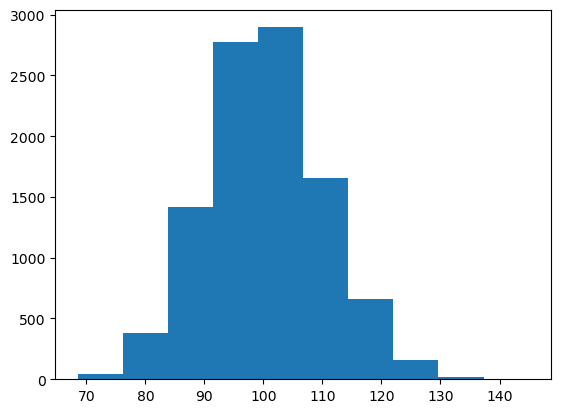

In [11]:
#Write a loop to simulate this process 10,000 times, and store each mean into an array called means_size_100
means_size_100 = []
for _ in range(10000):
    sample = np.random.choice(pop_data, 100) #Use numpy's random.choice to simulate 100 draws(sample size) from the pop_data array
    means_size_100.append(sample.mean()) #Compute the mean of these 100 draws
    
plt.hist(means_size_100);

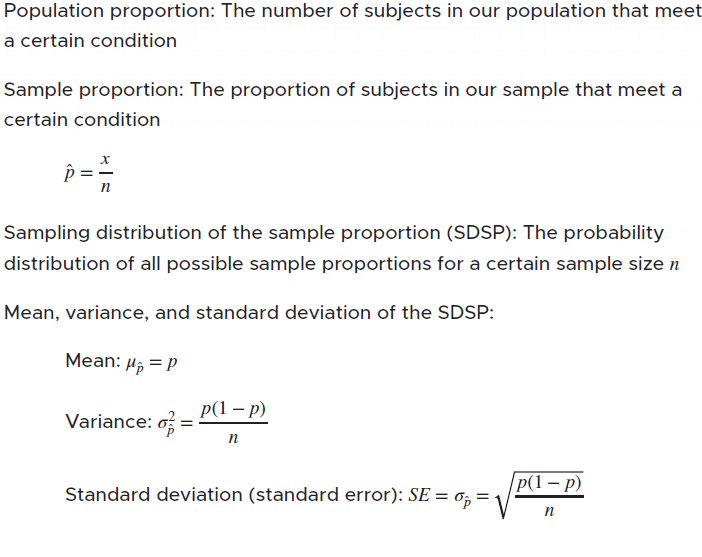

**Conditions for inference with the SDSP**
- In order to use the sampling distribution of the sample proportion, we need to meet the random, normal, and independent conditions. 
- We meet the normal condition when np ≥ 5 and n(1 − p) ≥ 5. 
- We meet the independent condition if we sample with replacement, and/or if we keep our sample size to 10% or less of the total population.

In [12]:
pop_data.var() # Variance of the population

9955.76939306549

In [ ]:
vars_size_100 = []
for _ in range(10000):
    sample = np.random.choice(pop_data, 100)
    vars_size_100.append(sample.var())
    plt.hist(vars_size_100);

In [ ]:
np.mean(vars_size_100) # The mean of the sampling distribution for the sample variance

In [ ]:
np.var(vars_size_100) # The variance of the sampling distribution for the sample variance

Sample variances are actually known to follow a different type of mathematical distribution known as a chi-squared distribution. Which is a more right-skewed distribution than a normal.

**`Step 1: Remove Outlier`**
- **IQR** 
- **Z-scores** can quantify the unusualness of an observation when your data follow the normal distribution. Z-scores are the number of standard deviations above and below the mean that each value falls. For example, a Z-score of 2 indicates that an observation is two standard deviations above the average. Conversely, a Z-score of -2 signifies it is two standard deviations below the mean. A Z-score of zero represents a value that equals the mean.
   - To calculate the Z-score for an observation, take the raw measurement, subtract the mean, and divide by the standard deviation. 
   - The further away an observation’s Z-score is from zero, the more unusual it is. A standard cut-off value for finding outliers are Z-scores of +/-3 or further from zero. Z-scores beyond +/- 3 are so extreme you can barely see the shading under the curve
   - In a population that follows the normal distribution, Z-score values more extreme than +/- 3 have a probability of 0.0027 (2 * 0.00135), which is about 1 in 370 observations. However, if your data don’t follow the normal distribution, this approach might not be accurate.
   - Note that Z-scores can be misleading with small datasets because the maximum Z-score is limited to (n−1) / √ n.
   - Also, note that the outlier's presence throws off the Z-scores because 
it inflates the mean and standard deviation
- **Grubbs’ test** checks for only one outlier. However, other 
methods, such as the **Tietjen-Moore Test**, require you to specify the 
number of outliers. That’s hard to do correctly! After all, you’re performing the test to find outliers! Masking and swamping are two problems that can occur when you specify the incorrect number of outliers 
in a dataset. **Masking** occurs when you specify too few outliers. The additional outliers that exist can affect the test so that it detects no outliers. For example, if you specify one outlier when there are two, the test can miss 
both outliers.
Conversely, **swamping** occurs when you specify too many outliers. In 
this case, the test identifies too many data points as being outliers. For 
example, if you specify two outliers when there is only one, the test 
might find two outliers

In [22]:
df = sns.load_dataset('iris') 
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [23]:
def outlier_treatment1(data,col):
    print("Old Shape: ", data.shape)
    sorted(col)
    Q1,Q3 = np.percentile(data[col] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    print("Upper limit",upper_range )
    print("Lower limit",lower_range )
    data =data[~((data[col] < lower_range) | (data[col] > upper_range))]
    print("New Shape: ", data.shape)

In [24]:
outlier_treatment1(data=df,col='sepal_width')

Old Shape:  (150, 5)
Upper limit 4.05
Lower limit 2.05
New Shape:  (146, 5)


In [25]:
def outlier_treatment2(data,col, threshold):
    print("Old Shape: ", data.shape)
    lower_range = data[col].mean() - threshold*data[col].std()
    upper_range = data[col].mean() + threshold*data[col].std()
    print("Upper limit",upper_range )
    print("Lower limit",lower_range )
    data =data[~((data[col] < lower_range) | (data[col] > upper_range))]
    print("New Shape: ", data.shape)

In [26]:
outlier_treatment2(data=df,col='sepal_width', threshold= 3)

Old Shape:  (150, 5)
Upper limit 4.3649321881434275
Lower limit 1.7497344785232403
New Shape:  (149, 5)


**`Step 2: Normality test`**

  - Shapiro-Wilk Test : [Click here](#SW)
  - D’Agostino’s K^2 Test : [Click here](#DA)
  - Anderson-Darling Test : [Click here](#AD)

In [27]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")   

**`Step 3: Variance test`**
- H0: σ12 = σ22 (the population variances are equal)
- H1: σ12 ≠ σ22 (the population variances are not equal)

1.  Levene’s Test: Use this test when you have fewer than 20 observations in a group or a group is very skewed. This method also works with more than two groups.
2.  Bonett’s Test: This test is usually more powerful than Levene’s test. Use this test unless you have a small sample and/or a very skewed distribution. Under these conditions, Bonett’s test has a higher Type I error rate than the significance level. 
3. Bartlett’s Test: At least two groups. Like the F-test, it is sensitive to even slight departures from normality. 
4. Chi-square method: 1 group. Use this method when you have one group and it follows the normal distribution. If your single group doesn’t follow the normal distribution, use Bonett’s test.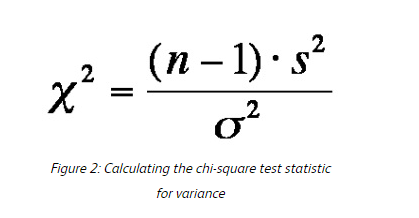
5. F-test: 2 groups. We covered the F-test in ANOVA when comparing means. However, you can also use it to compare variances when you have two groups. The F-test is often more powerful than the other tests. However, in this context, the F-test is very sensitive to departures from normality. If you aren’t sure your data are normally distributed, use one of the other tests.

In [28]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [29]:
# performing Bartlett's test
def check_variance_homogeneity2(*groups):
    test_stat_var, p_value_var= stats.bartlett(data[0], data[1], data[2])
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [30]:
import numpy as np
from scipy.stats import chi2

def var_test(x, va0, direction = "two-tailed", alpha = 0.05):
    n = len(x)
    Q = (n - 1) * np.var(x) / va0 
    if direction == "lower":
        q = chi2.ppf(alpha, n - 1)
        if Q <= q:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"
    elif direction == "upper":
        q = chi2.ppf(1 - alpha, n - 1)
        if Q >= q:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"
    else:
        q1 = chi2.ppf(alpha / 2, n - 1)
        q2 = chi2.ppf(1 - (alpha / 2), n - 1)
        if Q <= q1 or Q >= q2:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"

n = 25    

x = np.random.normal(0, 3, n)

var_test(x, va0 = 1)

'H_0 rejected'

In [31]:
x = [18, 19, 22, 25, 27, 28, 41, 45, 51, 55]
y = [14, 15, 15, 17, 18, 22, 25, 25, 27, 34]
import numpy as np
import scipy

#define F-test function
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

#perform F-test
f_test(x, y)

(4.38712, 0.019127)

(4.38712, 0.019127)

**`Step 4: Choose Test`**

**Continuous Data**
- One mean to reference value: 
  - Z test [Click here](#ztest)
  - 1-sample t-test `scipy.stats.ttest_1samp(a, popmean, alternative='two-sided')` [Click here](#T)
    - ‘two-sided’: the mean of the underlying distribution of the sample is different than the given population mean (popmean)
    - ‘less’: the mean of the underlying distribution of the sample is less than the given population mean (popmean)
    - ‘greater’: the mean of the underlying distribution of the sample is greater than the given population mean (popmean)
  
- Means for two groups:  
  - 2-sample t-test `ttest_ind(method['Method A'],method['Method B'], alternative='two-sided')`[Click here](#2T)
  - Paired t [Click here](#PAIREDT)
  - Comparing CIs [Click here](#CI)
- Means for at least three groups:  
  - One-Way ANOVA [Click here](#ANOVA)
  - Two Way ANOVA [Click here](#2ANOVA)
- Compare specific groups from ANOVA: 
  - Post hoc tests [Click here](#POSTHOC)
  - Tukey’s Method [Click here](#TUKEY)
  - Dunnett’s Method [Click here](#Dunnett)
  - Hsu’s MCB [Click here](#HSU)
- One standard deviation to reference:  1 Sample Variance Test [Click here](#1V)
- Standard deviations for two groups :2 Sample Variance Test [Click here](#2V)
- Correlation between two continuous variables: Pearson’s correlation coefficient [Click here](#PEARSON)
- Medians: Nonparametric tests, Mann-Whitney Test [Click here](#NP)

**Binary Data**
- One proportion to a target : 1 Proportions Test [Click here](#1P)
- Proportions for two groups: 2 Proportions Test [Click here](#2P)
- Control chart: P control chart [Click here](#PCONTROL)

**Count Data**
- Do your counts follow the Poisson distribution?: Poisson Goodness-of-Fit Test [Click here](#POISSONGOOD)
- One rate to a target: 1 Sample Poisson Rate Test [Click here](#1POISSON)
- Rates for two groups: 2 Sample Poisson Rate Test [Click here](#2POISSON)


**Categorical Data**
- Association between two categorical variables: Chi-Squared Test of Independence [Click here](#CHI)
- Do the proportions of values follow a hypothesized distribution?: Chi-Square Goodness-of-Fit test [Click here](#CHIGOOD)

**Ordinal and Ranked Data**
- Medians, Ordinal and Ranked data: Nonparametric tests, Mann-Whitney Test [Click here](#NP)
- Correlation between variables: 
  - Spearman’s Rank Correlation [Click here](#SPEARMAN)
  - Kendall’s Rank Correlation [Click here](#KENDALL)

**Various**: Bootstrapping Methods [Click here](#BOOTSTRAPPING)

#### Stationary Tests
  - Augmented Dickey-Fuller [Click here](#ADF)
  - Kwiatkowski-Phillips-Schmidt-Shin [Click here](#KPSS)

**Nonparametric Statistical Hypothesis Tests**
- Mann-Whitney Test: Ordinal and Ranked data [Click here](#MWUT)
- Friedman Test : Data should be ordinal (e.g. the Likert scale) or continuous [Click here](#FT)
- Wilcoxon Signed-Rank Test: interval or ratio data [Click here](#WSRT)
- Kruskal-Wallis H Test: Ordinal scale, Ratio Scale or Interval scale dependent variables. [Click here](#KWHT)

**Theory**
- Means [Click here](#MEANS)
- Normal Distribution [Click here](#NORMAL)
- Useful Commands [Click here](#COMMANDS)
- Errors [Click here](#errors)
- Power [Click here](#power)
- Directional vs Non Directional [Click here](#vs)
- Effect Size [Click here](#effectsize)


- **Independent Events**: In the context of sampling, events are independent when observing the current item doesn’t influence or provide insight about the value of the next item you measure, or any other items in the sample. There is no connection between the observations.
  - Independence relates to how you define your population and the process by which you obtain your sample. It pretty much boils down to random sampling and not using a convenience sample. The best practice is to define your population and then draw a random sample from that population.
- **Identically Distributed**:Identically distributed relates to the probability distribution that describes the characteristic you are measuring. Specifically, one probability distribution should adequately model all values you observe in a sample. Consequently, a dataset should not contain trends because they indicate that one probability distribution does not describe all the data. Check control charts
- If we selected a random sample from a population, then on average the value of the sample mean will equal the population mean. In our example, The sampling distribution for a population mean is equal to 1,000. If 1,000 is the correct population mean, then we know that, on average, the sample mean will equal 1,000 (the population mean). Using the **empirical rule**, we know that about 95% of all samples selected from this population will have a sample mean that falls within two standard deviations (SD) of the mean. It is therefore unlikely (less than a 5% probability) that we will measure a sample mean beyond 2 SD from the population mean, if the population mean is indeed correct.
- **Step 1: State the hypotheses.**
  - The **null hypothesis (H0)**, stated as the null, is a statement about a population parameter, such as the population mean, that is assumed to be true. For example, we might want to test the claim that the mean number of hours that children in the United States watch TV is 3 hours
  - The **alternative hypothesis** states what we think is wrong about the null hypothesis, which is needed for Step 2. For the children watching TV example, we may have reason to believe that children watch more than (>) or less than (<) 3 hours of TV per week. When we are uncertain of the direction, we can state that the value in the null hypothesis is not equal to (≠) 3 hours
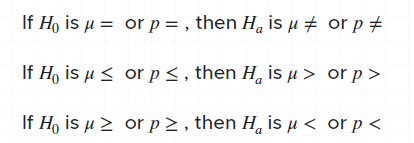
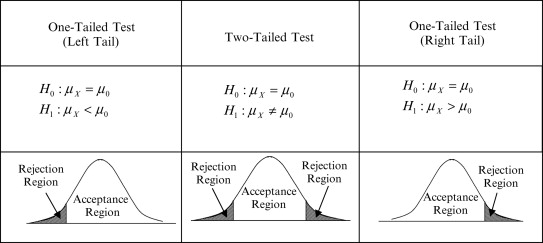

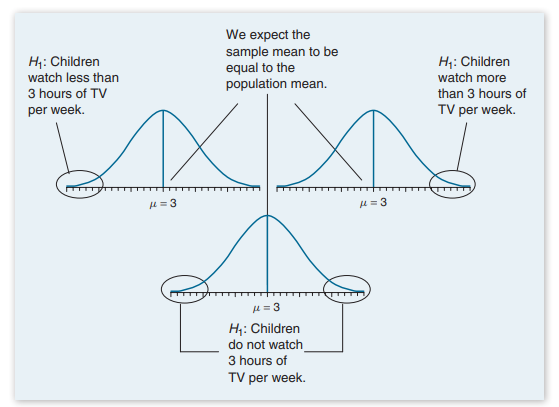

**Step 2: Set the criteria for a decision.** 
- **Level of significance**, or significance level, refers to a criterion of judgment upon which a decision is made regarding the value stated in a null hypothesis. The criterion is based on the probability of obtaining a statistic measured in a sample if the value stated in the null hypothesis were true.
- In behavioral science, the criterion or level of significance is typically set at 5%. When the probability of obtaining a sample mean is less than 5% if the null hypothesis were true, then we reject the value stated in the null hypothesis.
1. At 90% confidence, the alpha value is = 1 − 90% = 10%
2. At 95% confidence, the alpha value is = 1 − 95% = 5%
3. At 99% confidence, the alpha value is = 1 − 99% = 1%
- A **critical value** is a cutoff value that defines the boundaries beyond which less than 5% of sample means can be obtained if the null hypothesis is true. Sample means obtained beyond a critical value will result in a decision to reject the null hypothesis
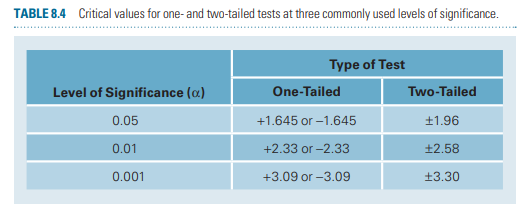
- The **rejection region** is the region beyond a critical value in a hypothesis test. 
When the value of a test statistic is in the rejection region, we decide to reject 
the null hypothesis; otherwise, we retain the null hypothesis

In [1]:
# Importing the library
import scipy.stats
  
# Determine the z-critical value for the left-tailed test
print(scipy.stats.norm.ppf(.05))

# Determine the z-critical value in right-tailed test
print(scipy.stats.norm.ppf(1-.05))

# Determine the z-critical value in a two-tailed test
print(scipy.stats.norm.ppf(1-.05/2))

-1.6448536269514729
1.6448536269514722
1.959963984540054


**Step 3: Compute the test statistic**
- Suppose we measure a sample mean equal to 4 hours per week that children watch TV. To make a decision, we need to evaluate 
how likely this sample outcome is, if the population mean stated by the null hypothesis (3 hours per week) is true. We use a **test statistic** to determine this likelihood. Specifically, a test statistic tells us how far, or how many standard deviations, a sample mean is from the population mean. The larger the value of the test statistic, the further the distance, or number of standard deviations, a sample mean is from the population mean stated in the null hypothesis.
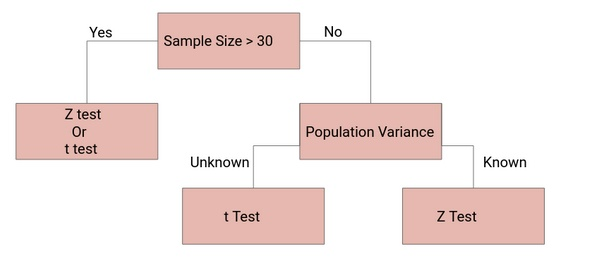
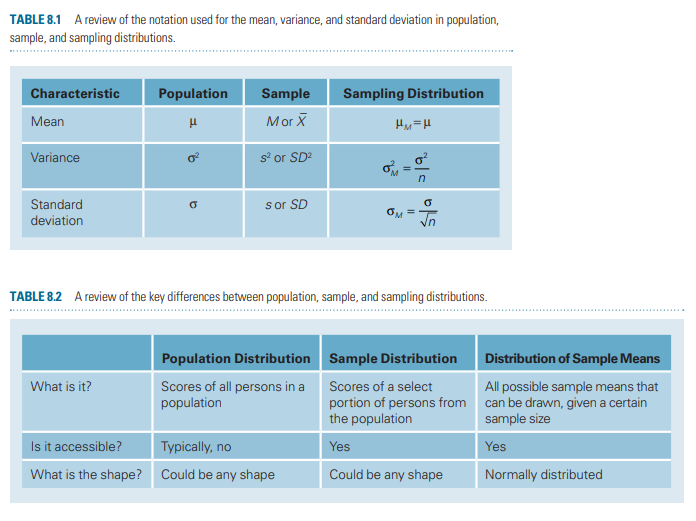
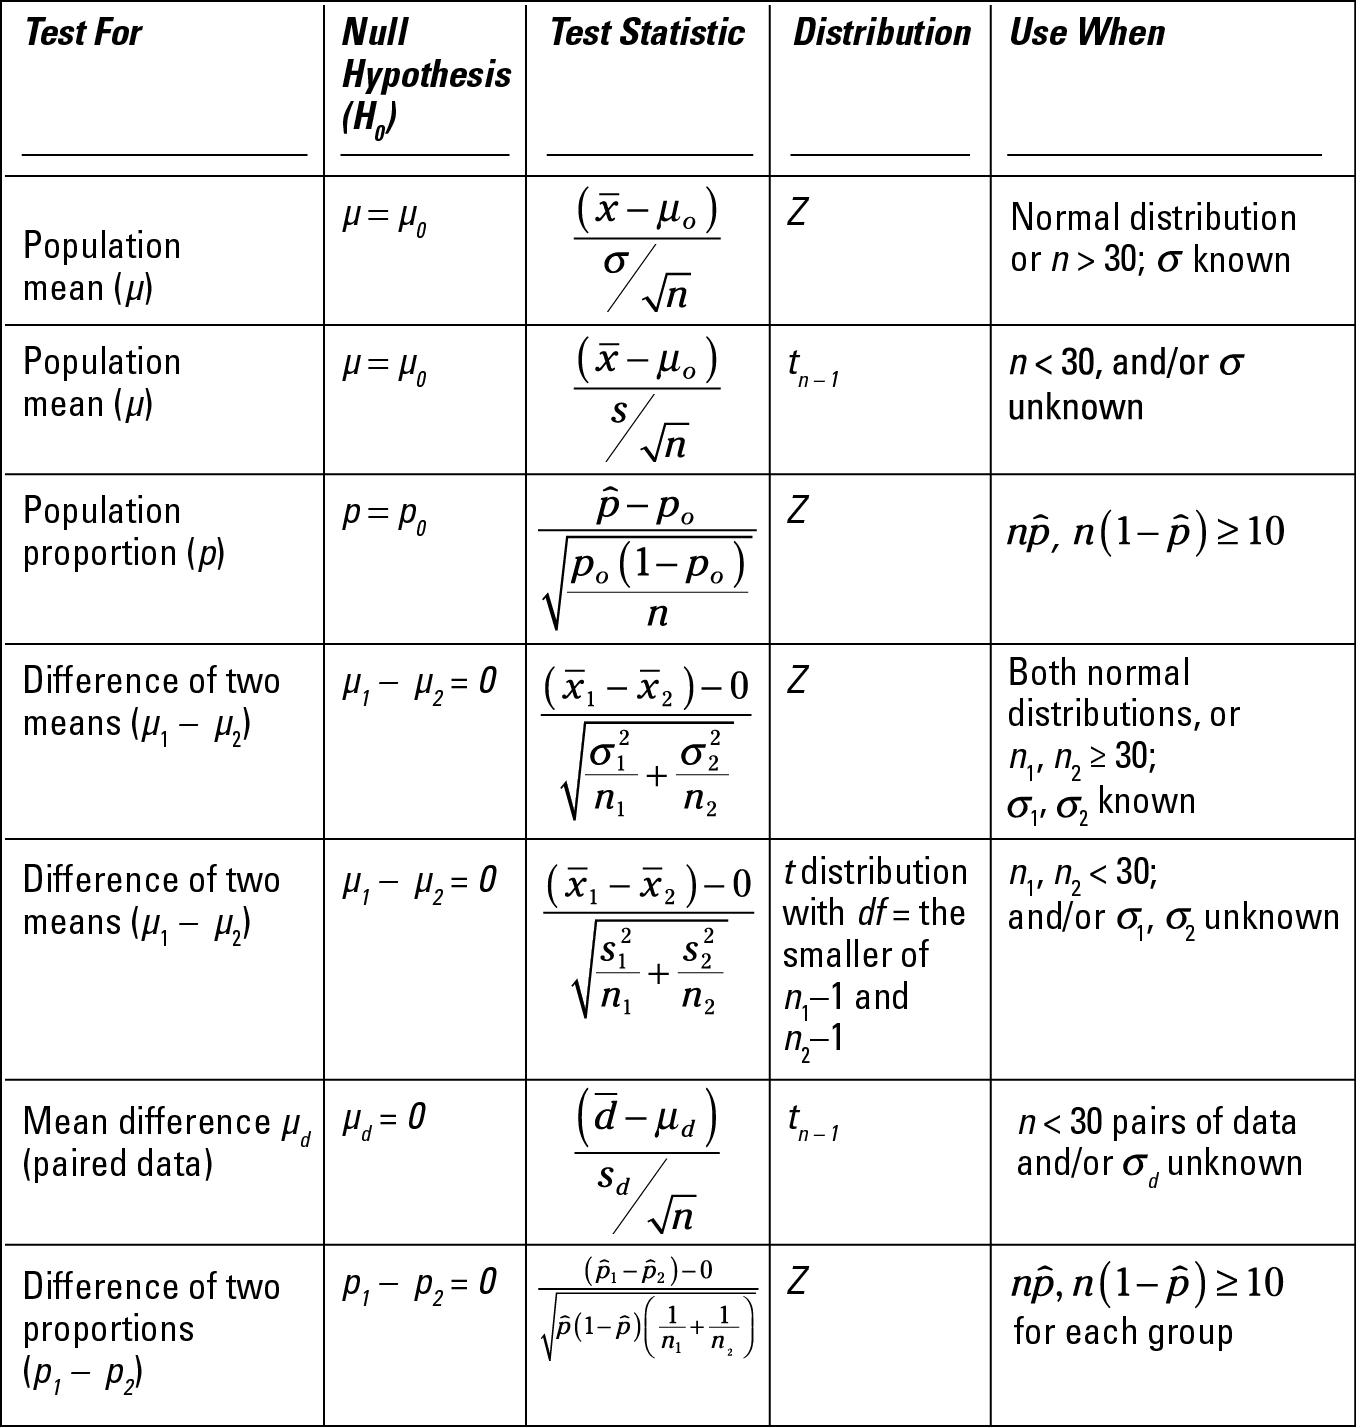

**Step 4: Make a decision.**
- If the probability of obtaining a sample mean is less than 5% when the null hypothesis is true, then the decision is to reject the null hypothesis. If the probability of obtaining a sample mean is greater than 5% when the null hypothesis is true, then the decision is to retain the null hypothesis. In sum, there are two decisions a researcher can make:
  1. Reject the null hypothesis. The sample mean is associated with a low probability of occurrence when the null hypothesis is true.
  2. Retain the null hypothesis. The sample mean is associated with a high probability of occurrence when the null hypothesis is true.
- The probability of obtaining a sample mean, given that the value stated in the null hypothesis is true, is stated by the **p value**. The p value is a probability: It varies between 0 and 1 and can never be negative. In Step 2, we stated the criterion or 
probability of obtaining a sample mean at which point we will decide to reject the value stated in the null hypothesis, which is typically set at 5% in behavioral research. To make a decision, we compare the p value to the criterion we set in Step 2.
- P values (or probability values) are used in hypothesis testing to represent the chance that, assuming the null hypothesis is true, you could observe the result in your study or one even more extreme
- If the P value is less than that critical value, you reject the null hypothesis. If it is equivalent or higher than the critical value, you fail to reject the null hypothesis.
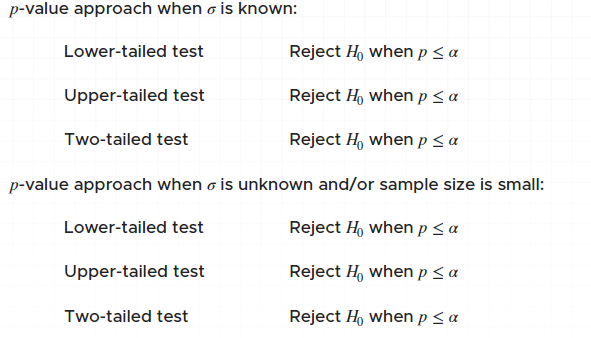

**Critical Value approach**: Critical values are like cut-off values that bound the rejection region(s). The critical values depend on the test statistic itself, z or t, and the level of significance.
- For example, if we perform an upper-tailed z-test and the level of significance is alpha = 0.05, then we can first look up the probability that’s closest to 0.95 in the z-table (since the test is upper-tailed), and then find the corresponding critical z-value from the table that’s equivalent to 1.96.
- The region of rejection is to the right of 1.96, so if the test statistic is larger than 1.96, we need to reject the null hypothesis. Otherwise, we accept the null.
- The two-tailed test for the proportion follows the same steps as the onetailed test, other than the fact that we split the alpha value into both tails. Because we’re doing a two-tailed test, apha = 0.05 needs to be split as 0.025 in the lower tail and 0.025 in the upper tail. Which means we’re looking for the value in the z-table that corresponds to 1 − .025 = 0.9750. So z = ± 1.96 will be the critical values.
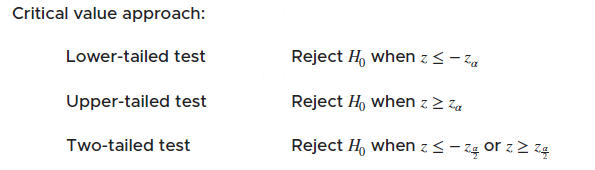

- A **hypothesis test** is a statistical procedure that allows you to use a sample to draw conclusions about an entire population.
-  The difference between the sample statistic and the 
population value is the **sampling error**. 
- Typically, the **null 
hypothesis** states there is no effect (i.e., the effect size equals zero). 
H0 often signifies the null. You can think of the null as the default theory that requires sufficiently strong evidence in your sample to be able to reject it.
- The **effect** is the difference between the population value and the null 
hypothesis value. The effect is also known as population effect or the 
difference. For example, if the mean of one group is 10 and the mean of another 
group is 2, the effect is 8.
- The **significance level**, also known as alpha or α, is an evidentiary standard that researchers set before the study. It specifies how strongly the sample evidence must contradict the null hypothesis before you can reject the null for the entire population. This standard is defined by the probability of rejecting a true null hypothesis. In other words, it is the probability that you say there is an effect when there is no effect. Lower significance levels indicate that you require more substantial evidence before you will reject the null
   - When the significance level is 0.05 and the null hypothesis is true, there is a 5% chance that the test will reject the null hypothesis incorrectly. If you set alpha to 0.01, there is a 1% of a false positive. If 5% is good, then 1% seems even better, right? - there is a tradeoff between Type I and Type II errors. If you hold everything else constant, as you reduce the chance for a false positive, you increase the opportunity for a false negative
   - **Warning about a potential misinterpretation of Type I errors and the Significance Level**:When the null hypothesis is correct for the population, the test’s probability for a false positive equals the significance level. However, when you look at a statistically significant test result, you cannot state that there is a 5% chance that it represents a false positive. Why is that the case? Imagine that we perform 100 studies on a population where the null hypothesis is true. If we use a significance level of 0.05, we’d expect that five of the studies will produce statistically significant results—false positives. Afterward, when we look at those significant studies, what is the probability that each is a false positive? Not 5 percent but 100%!
- **P-values** are the probability that you would obtain the effect observed in your sample, or larger, if the null hypothesis is correct. In simpler terms, p-values tell you how strongly your sample data contradict the null. Lower p-values represent stronger evidence against the null.
   - **Replication** of a research study refers to repeating an experiment by using the same procedures but with a different sample. The researchers want to see if the replicate study reproduces the original findings.
   - Clearly, if the replicate study obtains similar findings, you can have more confidence in the results. When an effect exists in the population, it should be apparent in most random samples drawn from that population. Failure to reproduce the results raises the possibility that the original study was a fluke
   - If lower p-values correspond to higher reproducibility rates, it suggests p-values provide meaningful information
   - Several factors influence statistical significance. These factors include the following:
     - **Effect size**: Larger effect sizes are less likely to represent random error. However, by itself, the effect size is insufficient.
     - **Sample size**: Larger sample sizes allow hypothesis tests to detect smaller effects.
     -  **Variability**: When your sample data are more variable, random sampling error is more likely to produce substantial differences between groups even when no effect exists in the population
     - Hypothesis tests with small effect sizes can produce very low p-values when you have a large sample size and/or the data have low variability. Consequently, effect sizes that are trivial in the practical sense can be statistically significant.Here’s how small effect sizes can still produce tiny p-values:
          - You have a very large sample size. As the sample size increases, the hypothesis test gains greater statistical power to detect small effects. With a large enough sample size, the hypothesis test can detect an effect that is so miniscule that it is meaningless in a practical sense.
          - The sample variability is very low. When your sample data have low variability, hypothesis tests can produce more precise estimates of the population’s effect. This precision allows the test to detect tiny effects.
   - **Tip 1: Smaller P-values are Better**:Simulation studies find that lower false positive rates are associated with smaller p-values. For example, a p-value close to 0.05 usually has an error rate of 25-50%. However, a p-value of 0.0027 often has an error rate of around 4.5%. That error rate is close to the rate that is often erroneously ascribed to a p-value of 0.05.  
   - **Tip 2: Replication is Crucial**:you can think of p-values as probabilities that you 
can multiply. For example, if two independent studies have p-values 
of 0.05, you can multiply them to obtain a probability of 0.0025.  You must 
include all studies in a series of relevant studies, whether they are significant or not.
   - **Tip 3: The Effect Size is Important**: The high pressure to obtain statistically significant p-values draws attention away from both the effect size and the estimate’s precision. You can have statistically significant test results even when effect 
sizes are too small to be practically meaningful. Additionally, a significant p-value does not necessarily indicate that the analysis could estimate the effect size with high precision.To place a greater emphasis on effect size and precision, use confidence interval
   - **Tip 4: The Plausibility of the Alternative Hypothesis Matters**
   - Tip 5: Use Your Expertise: You must apply your subject area knowledge to all facets of hypothesis testing to avoid misleading results. 
- The **critical region** defines sample values that are improbable enough 
to warrant rejecting the null hypothesis.
- Different random samples drawn from the same population are liable 
to produce slightly different intervals. If you draw many random samples and calculate a confidence interval for each sample, a specific proportion of the intervals contain the population parameter. That 
percentage is the **confidence level**. 
- There are two critical differences between the sampling distribution 
graphs for significance levels and confidence intervals. The significance level chart centers on the null value, and we shade the outside 
5% of the distribution. Conversely, the confidence interval graph centers on the sample mean, and we shade the center 95% of the distribution.
- A confidence level determines the distance between the sample mean and the confidence limits.
- A significance level determines the distance between the sample mean and the critical regions.
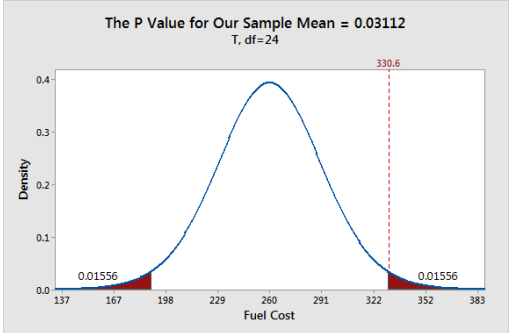 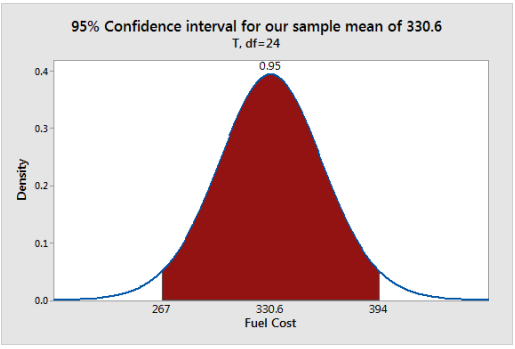
- **1 sample T Test Statistics**: The denominator of the ratio is the standard error of the mean, which measures the sample variation. 
   - The standard error of the mean represents how much random error is in the sample and how well the sample estimates the population mean. 
   - In our analogy, random error represents noise. Why? When there is more random error, you are more likely to see considerable differences between the sample mean and the null hypothesis value in cases where the null is true. Noise appears in the denominator to provide a benchmark for how large the signal must be to distinguish from the noise.
   - If the signal is of the same general magnitude as the noise, random error likely causes the difference between the sample mean and null value rather than an actual population difference.
- **2 sample T Test Statistics**: Larger absolute t-values represent stronger signals, or effects, that stand out more from the noise
- **What Are t-Distributions?**
  -  First, let’s assume that the null hypothesis is true for the population. Now, suppose we repeat our study many times by drawing numerous random samples of the same size from this population. Next, we perform t-tests on all the samples and plot the distribution of the t-values. This distribution is known as a sampling distribution, which is a type of probability distribution
  - If we follow this procedure, we produce a graph that displays the distribution of t-values that we obtain from a population where the null hypothesis is true. We use sampling distributions to calculate probabilities for how unusual our sample statistic is if the null hypothesis is true.
  - The t-distribution centers on zero because it assumes that the null hypothesis is correct. When the null is true, your study is most likely to obtain a t-value near zero and less liable to produce t-values further from zero in either direction.
  - Hypothesis tests work by taking the observed test statistic from a sample and using the sampling distribution to calculate the probability of obtaining that test statistic if the null hypothesis is correct. In the context of how t-tests work, you assess the likelihood of a t-value using the t-distribution. If a t-value is sufficiently improbable when the null hypothesis is true, you can reject the null hypothesis.
  - Additionally, it is possible to calculate a probability only for a range of t-values. On a probability distribution plot, probabilities are represented by the shaded area under a distribution curve.
- **Degrees of Freedom**: Degrees of freedom are the number of independent values that a statistical analysis can estimate. You can also think of it as the number of values that are free to vary as you estimate parameters. 
- Typically, the degrees of freedom equal your sample size minus the number of parameters you need to calculate during an analysis.

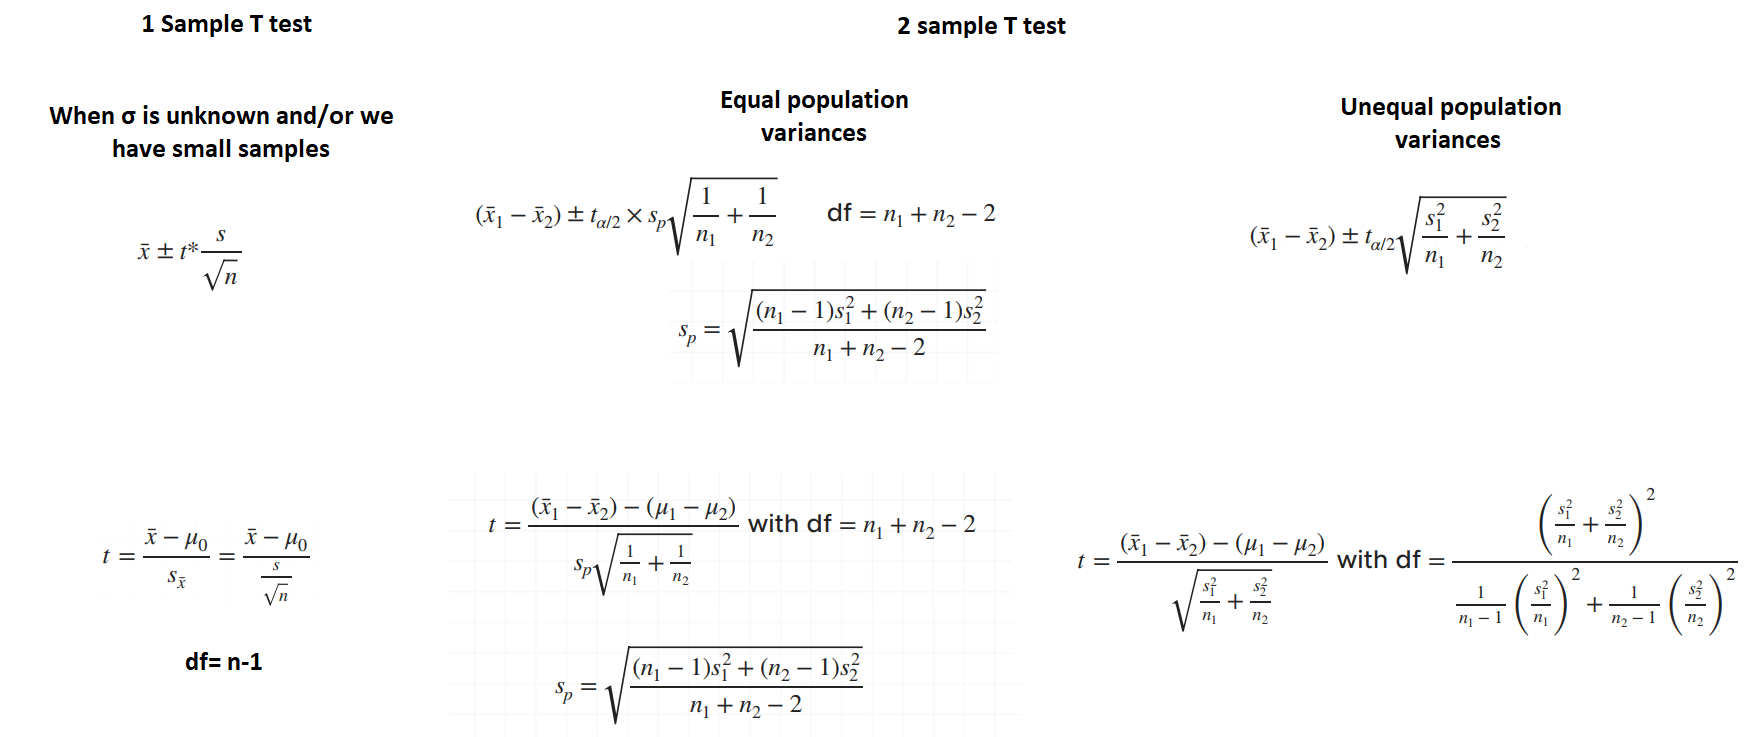

**Advantages of Parametric Tests**
- **Advantage 1**: Parametric tests can provide trustworthy results with 
distributions that are skewed and nonnormal
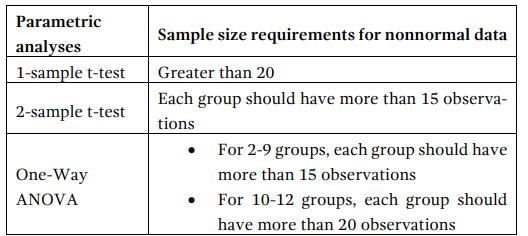
- **Advantage 2**: Parametric tests can provide trustworthy results when 
the groups have different amounts of variability
It’s true that nonparametric tests don’t require normally distributed 
data. However, nonparametric tests have the disadvantage of an additional requirement that can be very hard to satisfy. The groups in a 
nonparametric analysis typically must all have the same variability 
(dispersion). Nonparametric analyses might not provide accurate results when variability differs between groups.

- **Advantage 3**: Parametric tests have greater statistical power
In most cases, parametric tests have more power. If an effect actually 
exists, a parametric analysis is more likely to detect it. For some datasets, nonparametric analyses provide an advantage because they assess the median rather than the mean. The mean is not 
always the better measure of central tendency for a sample. Even 
though you can perform a valid parametric analysis on skewed data, 
that doesn’t necessarily equate to being the better method

**Advantages of Nonparametric Tests**
- **Advantage 1**: Nonparametric tests assess the median which can be 
better for some study areas
- **Advantage 2**: Nonparametric tests are valid when our sample size is 
small and your data are potentially nonnormal
Use a nonparametric test when your sample size isn’t large enough to 
satisfy the requirements in the table above and you’re not sure that 
your data follow the normal distribution. With small sample sizes, be 
aware that normality tests can have insufficient power to produce useful results.
This situation is difficult. Nonparametric analyses tend to have lower 
power at the outset, and a small sample size only exacerbates that 
problem.
- **Advantage 3**: Nonparametric tests can analyze ordinal data, ranked 
data, and outliers

**P chart** 
<a id='PCONTROL'></a>
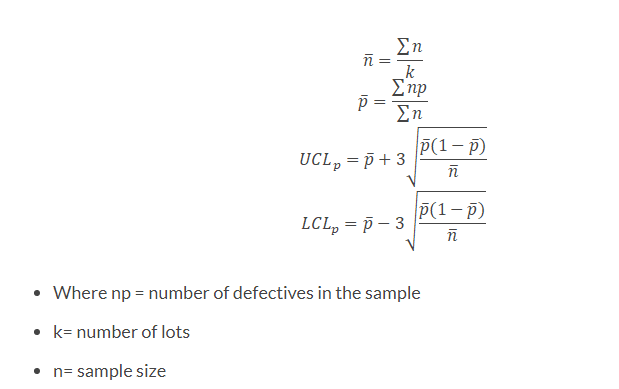

In [10]:
data6 =  np.array([12,15,8,10,4,7,16,9,14,10,5,6,17,12,22,8,10,5,13,11,20,18,24,15,9,12,7,13,9,6])
class p_ControlChart:
    def fit(self,D,n):
        self.D = D
        self.n = n 
        self.p = np.zeros(len(self.D)) 
        for i in range(len(D)):
            self.p[i] = D[i] / n
    
    def ControlChart(self):
        m      = len(self.p)
        p_mean = self.p.sum() / m
        
        ucl = p_mean + 3*np.sqrt((p_mean*(1-p_mean))/(self.n))
        cl  = p_mean
        lcl = p_mean - 3*np.sqrt((p_mean*(1-p_mean))/(self.n)) 
        
        plt.figure(figsize=(15,5))
        plt.plot(self.p,marker="o",color="k",label="$p_i$")
        plt.plot([ucl]*(len(self.D)),label="UCL",color="r")
        plt.plot([cl]*(len(self.D)),label="CL",color="k",alpha=0.4)
        plt.plot([lcl]*(len(self.D)),label="LCL",color="r")
        plt.legend(loc="best")
        plt.xticks(np.arange(len(self.D)))
        plt.title("p Control Chart")
        plt.show()
        
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.boxplot(self.D,vert=False)
        plt.title("Boxplot of Data")
        plt.ylabel("Data")
        plt.subplot(1,2,2)
        plt.hist(self.D,bins=int(len(self.D)/3),density=True,color="blue")
        plt.ylabel("Frequency")
        plt.title("Histogram of Data")
        plt.show()

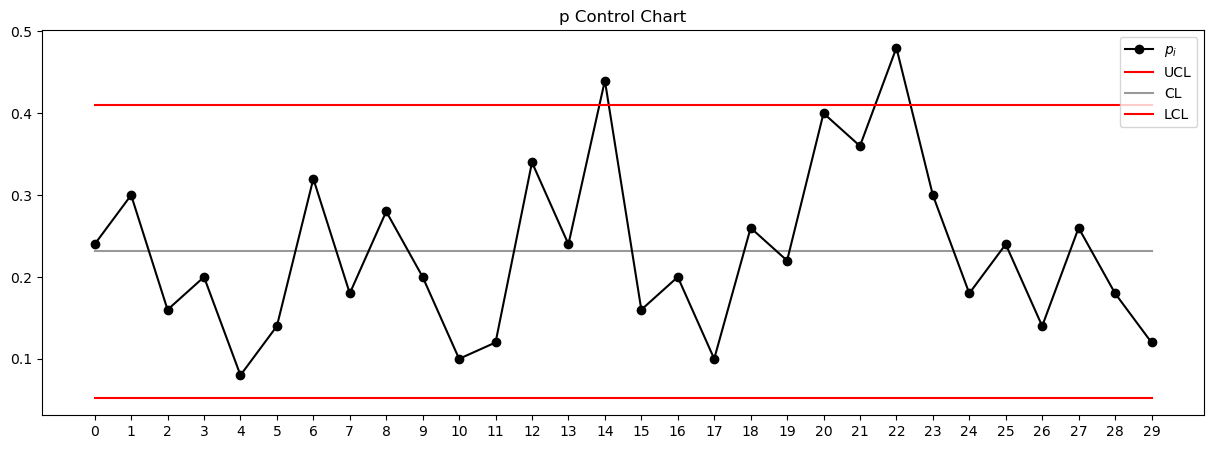

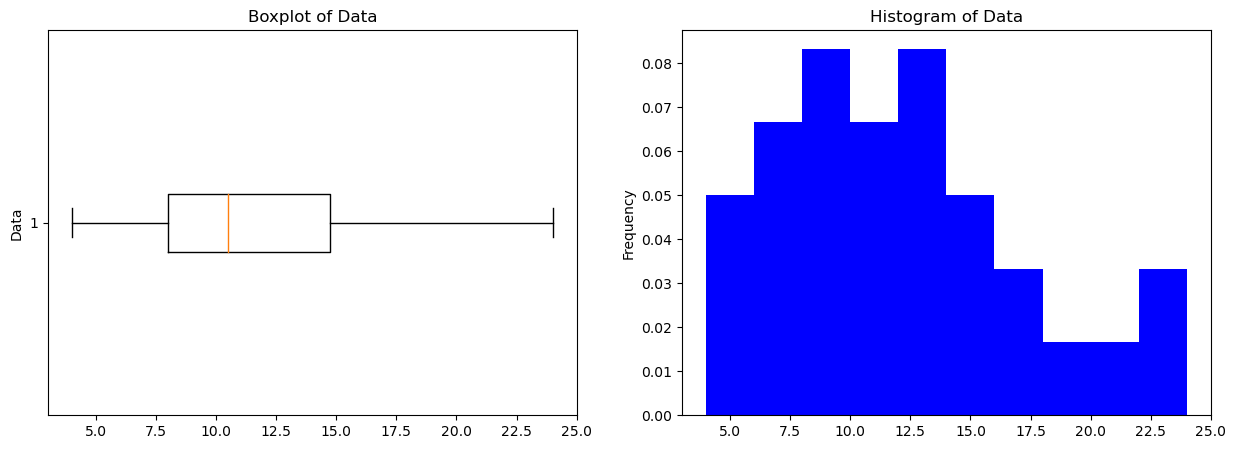

In [11]:
chart = p_ControlChart()
chart.fit(D=data6,n=50)
chart.ControlChart()

# Distribution tests
- These are hypothesis tests that determine whether your random sample data were drawn from a population that follows a hypothesized probability distribution. 
- Null: The sample data follow the hypothesized distribution.
- Alternative: The sample data do not follow the hypothesized distribution.
- For distribution tests, small p-values indicate that you can reject the 
null hypothesis and conclude that your data were not drawn from a 
population with the specified distribution. However, we want to identify the probability distribution that our data follow rather than the 
distributions they don’t follow! Consequently, distribution tests are a 
rare case where you look for **high p-values** to identify candidate distributions.
1. **Normality Tests**
This section lists statistical tests that you can use to check if your data has a Gaussian distribution.

  - **Shapiro-Wilk Test**: <a id='SW'></a>
    - Tests whether a data sample has a Gaussian/normal distribution. 
    - Assumptions: Observations in each sample are independent and identically distributed (iid).
    - Interpretation:
       - H0: the sample has a Gaussian distribution.
       - H1: the sample does not have a Gaussian distribution.
       - Unlike the D’Agostino-Pearson test, the Shapiro-Wilk test doesn’t use the shape of the distribution to determine whether or not it is normal. Instead, it compares the actual SD of the data to the SD computed from the slope of the QQ plot for the data, and calculates their ratio. If the data are sampled from a Gaussian distribution, the two values will be similar, so the ratio will be close to 1.0, while a ratio much different from one would suggest a non-normal distribution. The Shapiro-Wilk test works very well if every value is unique, but does not work as well when several values are identical. 

In [32]:
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
test_statistic, p = shapiro(data)
print('test_statistic=%.3f, p=%.3f' % (test_statistic, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

test_statistic=0.895, p=0.193
Probably Gaussian


  - **D’Agostino’s K^2 Test**:<a id='DA'></a>
    - Tests whether a data sample has a Gaussian/normal distribution.
    - Assumptions: Observations in each sample are independent and identically distributed (iid).
    - Interpretation:
       - H0: the sample has a Gaussian distribution.
       - H1: the sample does not have a Gaussian distribution.
    - The D'Agostino-Pearson normality test first computes the skewness and kurtosis to quantify how far the distribution is from Gaussian in terms of asymmetry and shape. It then calculates how far each of these values differs from the value expected with a Gaussian distribution, and computes a single P value from the sum of these discrepancies. It is a versatile and powerful normality test, and is generally recommended. However, it should be noted that there are exceptions to this recommendation. Specifically, when a distribution has a skewness and kurtosis that are very close to that of a normal distribution, but are definitely non-normal, this test will not be able to identify the distribution as being non-normal.

In [33]:
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
k2, p = normaltest(data)
alpha = 1e-3
print('test_statistic=%.3f, p=%.3f' % (k2, p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

test_statistic=3.392, p=0.183
The null hypothesis cannot be rejected


  - **Anderson-Darling Test**:<a id='AD'></a>
    - Anderson-Darling test for data coming from a particular distribution. The Anderson-Darling test tests the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.
    - Assumptions: Observations in each sample are independent and identically distributed (iid).
    - The Anderson-Darling test computes the P value by comparing the cumulative distribution of your data set against the ideal cumulative distribution of a Gaussian distribution. It takes into account the discrepancies at all parts of the cumulative distribution curve.
    - Critical values provided are for the following significance levels:
      - normal/exponential: 15%, 10%, 5%, 2.5%, 1%
      - logistic: 25%, 10%, 5%, 2.5%, 1%, 0.5%
      - Gumbel: 25%, 10%, 5%, 2.5%, 1%
      - If the returned statistic is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected. The returned statistic is referred to as ‘A2’ in the references.
    - Interpretation:
       - H0: the sample has a Gaussian distribution.
       - H1: the sample does not have a Gaussian distribution.

In [34]:
from scipy.stats import anderson
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result = anderson(data, dist= 'norm')
result

AndersonResult(statistic=0.4239737141854807, critical_values=array([0.501, 0.57 , 0.684, 0.798, 0.95 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [35]:
from scipy.stats import anderson
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result = anderson(data, dist= 'norm')
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.424
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


# Correlation Tests
This section lists statistical tests that you can use to check if two samples are related.

  - **Pearson’s Correlation Coefficient**: <a id='PEARSON'></a>
  - Tests whether two samples have a linear relationship.This hypothesis test determines whether the correlation you see in your sample exists in the population. The hypotheses for Pearson’s correlations are the following:
- Null: There is no correlation between the variables (ρ = 0).
- Alternative: There is a correlation between the variables (ρ ≠ 0).

- For reliable Pearson’s correlation test results, your data should satisfy the following assumptions:
  - Two continuous variables
  - Linear relationship
  - Observations in each sample are independent and identically distributed (iid).
  - Observations in each sample are normally distributed.
  - Observations in each sample have the same variance.
  - Outliers have a considerable influence on the results. It should be the absence of outliers.
  - Data follow a bivariate normal distribution or you have at least 25 observation
          
- The Pearson correlation coefficient measures the linear relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.
- The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets.
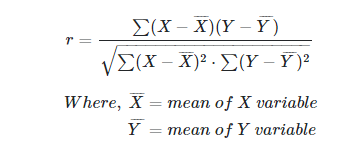

In [36]:
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


In [37]:
pearsonr(data1, data2).confidence_interval()

ConfidenceInterval(low=0.10292803124800504, high=0.9193617353215987)

  - **Spearman’s Rank Correlation**: <a id='SPEARMAN'></a>
  - Tests whether two samples have a monotonic relationship. In a monotonic relationship, the variables tend to move in the same relative direction, but not necessarily at a constant rate. In a linear relationship, the variables move in the same direction at a constant rate.
    - Assumptions: 
      - Observations in each sample are independent and identically distributed (iid).
      - Observations in each sample can be ranked.
    - Interpretation:
       - H0: the two samples are independent.
       - H1: there is a dependency between the samples.
    - The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. Although calculation of the p-value does not make strong assumptions about the distributions underlying the samples, it is only accurate for very large samples (>500 observations). 

In [38]:
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


 - **Kendall’s Rank Correlation**: <a id='KENDALL'></a>
 - Tests whether two samples have a monotonic relationship. Calculate Kendall’s tau, a correlation measure for ordinal data.
    - Assumptions: 
      - Observations in each sample are independent and identically distributed (iid).
      - Observations in each sample can be ranked.
    - Interpretation:
       - H0: the two samples are independent.
       - H1: there is a dependency between the samples.
    - The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. Although calculation of the p-value does not make strong assumptions about the distributions underlying the samples, it is only accurate for very large samples (>500 observations). 

In [39]:
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=0.733, p=0.002
Probably dependent


 - **Chi-Squared Test**:<a id='CHI'></a>
 - Tests whether two categorical variables are related or independent.
    - Assumptions: 
      - Observations used in the calculation of the contingency table are independent.
      - 25 or more examples in each cell of the contingency table.
    - Interpretation:
       - H0: the two samples are independent.
       - H1: there is a dependency between the samples.
    - dof = observed.size - sum(observed.shape) + observed.ndim - 1

In [40]:
import numpy as np
import pandas as pd
np.random.seed(10)

# Sample data randomly at fixed probabilities
voter_race = np.random.choice(a= ["asian","black","hispanic","other","white"],
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Sample data randomly at fixed probabilities
voter_party = np.random.choice(a= ["democrat","independent","republican"],
                              p = [0.4, 0.2, 0.4],
                              size=1000)

voters = pd.DataFrame({"race":voter_race, 
                       "party":voter_party})
voters

race        party
0       white     democrat
1       asian   republican
2       white  independent
3       white   republican
4       other     democrat
..        ...          ...
995     white   republican
996  hispanic  independent
997     black  independent
998     white   republican
999     black     democrat

[1000 rows x 2 columns]

In [41]:
voter_tab = pd.crosstab(voters['race'], voters['party'], margins = True)
voter_tab

party     democrat  independent  republican   All
race                                             
asian           21            7          32    60
black           65           25          64   154
hispanic       107           50          94   251
other           15            8          15    38
white          189           96         212   497
All            397          186         417  1000

In [42]:
voter_tab.columns = ["democrat","independent","republican","row_totals"]
voter_tab.index = ["asian","black","hispanic","other","white","col_totals"]
observed = voter_tab.iloc[0:5,0:3]   # Get table without totals for later use
voter_tab

democrat  independent  republican  row_totals
asian             21            7          32          60
black             65           25          64         154
hispanic         107           50          94         251
other             15            8          15          38
white            189           96         212         497
col_totals       397          186         417        1000

To get the expected count for a cell, multiply the row total for that cell by the column total for that cell and then divide by the total number of observations. We can quickly get the expected counts for all cells in the table by taking the row totals and column totals of the table, performing an outer product on them with the np.outer() function and dividing by the number of observations:

In [43]:
expected =  np.outer(voter_tab["row_totals"][0:5],
                     voter_tab.loc["col_totals"][0:3]) / 1000

expected = pd.DataFrame(expected)

expected.columns = ["democrat","independent","republican"]
expected.index = ["asian","black","hispanic","other","white"]

expected

democrat  independent  republican
asian       23.820       11.160      25.020
black       61.138       28.644      64.218
hispanic    99.647       46.686     104.667
other       15.086        7.068      15.846
white      197.309       92.442     207.249

In [44]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

7.169321280162059


In [45]:
import scipy.stats as stats
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 8)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=8)
print("P value")
print(p_value)

Critical value
15.50731305586545
P value
0.518479392948842


Note: The degrees of freedom for a test of independence equals the product of the number of categories in each variable minus 1. In this case we have a 5x3 table so df = 4x2 = 8.

As expected, given the high p-value, the test result does not detect a significant relationship between the variables.

In [46]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
stat, p, dof, expected, = chi2_contingency(observed= observed)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=7.169, p=0.518
Probably independent


In [47]:
stats.chi2_contingency(observed= observed)

(7.169321280162059,
 0.518479392948842,
 8,
 array([[ 23.82 ,  11.16 ,  25.02 ],
        [ 61.138,  28.644,  64.218],
        [ 99.647,  46.686, 104.667],
        [ 15.086,   7.068,  15.846],
        [197.309,  92.442, 207.249]]))

#  Stationary tests
- This section lists statistical tests that you can use to check if a time series is stationary or not.
- Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.
- Observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index. 
- Summary statistics like the mean and variance do change over time, providing a drift in the concepts a model may try to capture. Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends and removing seasonal effects.
- The suggestion here is to treat properties of a time series being stationary or not as another source of information that can be used in feature engineering and feature selection on your time series problem when using machine learning methods.

  - **Augmented Dickey-Fuller Unit Root Test**:<a id='ADF'></a>
  - Tests whether a time series has a unit root, e.g. has a trend or more generally is autoregressive
    - Assumptions: 
      - Observations in are temporally ordered.
    - Interpretation:
       - Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
       - Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

In [48]:
from statsmodels.tsa.stattools import adfuller
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably not Stationary')
else:
 print('Probably Stationary')

stat=1.496, p=0.998
Probably not Stationary


- **Kwiatkowski-Phillips-Schmidt-Shin**: <a id='KPSS'></a>
- Tests whether a time series is trend stationary or not.
    - Assumptions: 
      - Observations in are temporally ordered.
    - Interpretation:
       - Null Hypothesis (H0): Tests whether a time series is trend stationary or not.
       - Alternate Hypothesis (H1): the time series is not trend-stationary.

In [49]:
from statsmodels.tsa.stattools import kpss
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Stationary')
else:
 print('Probably not Stationary')

stat=0.594, p=0.023
Probably not Stationary


# Parametric Statistical Hypothesis Tests
- **Student’s 1 sample-t-test**:<a id='1T'></a>
- Tests whether the means of two independent samples are significantly different.
    - Assumptions: 
      - Observations in each sample are independent and identically distributed (iid).
      - Your sample data should follow a normal distribution or have more than 30 observations
      - Observations in each sample have the same variance.
      - Your data must be continuous
    - Interpretation for means:
      - H0: The population mean equals the hypothesized mean.
      - H1: : The population mean does not equal the hypothesized mean

#### Example 1 in 3 ways

#### Way 1

In [50]:
import pandas as pd
assess= pd.read_csv('AssessmentScores.csv')
assess

Score
0   69.118225
1   73.705033
2   83.539635
3   53.115325
4   61.805602
5   73.953595
6   50.429088
7   55.799784
8   53.325763
9   49.712724
10  79.039879
11  73.355643
12  53.463721
13  72.265550
14  59.743231

In [51]:
from scipy.stats import ttest_1samp
answer = ttest_1samp(a=assess, popmean=60, alternative= 'two-sided')
print('t statistic=%.3f, p=%.3f' %(answer.statistic, answer.pvalue))
if p > 0.05:
 print('The population mean equals the hypothesized mean')
else:
 print(' The population mean does not equal the hypothesized mean')

t statistic=1.418, p=0.178
 The population mean does not equal the hypothesized mean


#### Way 2

In [52]:
import scipy.stats 
def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

In [53]:
mean_confidence_interval(assess)

(array([57.87047697]), array([70.44589605]))

In [54]:
import scipy.stats as st
ci = st.t.interval(confidence=0.95, df=len(assess)-1, loc=np.mean(assess), scale=st.sem(assess))
ci

(array([57.87047697]), array([70.44589605]))

 The confidence interval estimates that the actual population mean is likely between 57.87 and 70.45. The confidence interval includes the reference 
value of 60, which is why we cannot conclude that the population 
mean is different from that value.

#### Way 3

In [55]:
sem= (assess.std()/np.sqrt(len(assess))) # np.std() does NOT perform beseel correction, use .std()
sem

Score    2.931625
dtype: float64

In [56]:
tstatistic= (np.mean(assess)- 60)/ (sem) #sem= standard error of mean
tstatistic

Score    1.41839
dtype: float64

In [57]:
# Determine p-value in a two-tailed test
print(scipy.stats.t.sf(abs(tstatistic), df=len(assess))*2)

[0.17651872]


In [58]:
pvalue= 2*(1 - t.cdf(abs(tstatistic), 14))
pvalue

AttributeError: 'numpy.float64' object has no attribute 'cdf'

- **Student’s 2 sample-t-test**:<a id='2T'></a>
- Tests whether the means of two independent samples are significantly different.
    - Assumptions: 
      - Observations in each sample are independent and identically distributed (iid).
      - Your sample data should follow a normal distribution or have more than 20 observations
      - Observations in each sample have the same variance.
      - Your data must be continuous
    - Interpretation:
      - H0: the means of the samples are equal.
      - H1: the means of the samples are unequal.
    - The twosample t-test has two methods. 
      - One method assumes that the two groups have equal variances while the other does not assume they are equal. 
      - The form that does not assume equal variances is known as **Welch’s t-test**. `ttest_ind(data_group1, data_group2, equal_var= False)`

In [59]:
import pandas as pd
method= pd.read_csv('t-TestExamples.csv')
method

Method A   Method B  Unnamed: 2  SubjectID     Pretest    Posttest
0   72.471714  72.145335         NaN          1   90.562946  110.641983
1   72.100548  89.811362         NaN          2   94.815788  101.587971
2   69.700219  98.071997         NaN          3  109.562299  120.607170
3   61.294691  84.486978         NaN          4   90.221665   83.221677
4   76.509736  80.530738         NaN          5   97.597791  109.272439
5   81.288642  84.858600         NaN          6   91.166870  115.806329
6   75.898287  70.828394         NaN          7   96.649917   99.895806
7   71.610303  90.863795         NaN          8   97.616258  117.940407
8   82.005608  73.113933         NaN          9   88.844910  106.052309
9   52.743031  93.715501         NaN         10   90.817006   82.822880
10  64.720142  83.399928         NaN         11   89.293687  116.639265
11  89.807999  86.025116         NaN         12  115.831946  128.609768
12  74.101000  92.191169         NaN         13  121.287283  119.664641
13  60.052173  91.876728         NaN         14   87.871787  108.382994
14  68.250180  79.216534         NaN         15   93.793262   96.373786

#### Step 1

In [60]:
from scipy import stats
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [61]:
check_variance_homogeneity(method['Method A'],method['Method B'])

p value:0.8724
Fail to reject null hypothesis >> The variances of the samples are same.


#### Step 2 - Way 1

In [62]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(method['Method A'],method['Method B'], alternative='two-sided')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print(' the means of the samples are equal.')
else:
 print('the means of the samples are unequal')

stat=-4.083, p=0.000
the means of the samples are unequal


#### Step 2 - Way 2

In [63]:
import scipy.stats 
def mean_confidence_interval(data1, data2, confidence=0.95):
    a = np.array(data1)
    b= np.array(data2)
    n1 = len(a)
    n2= len(b)
    m1, m2, se = np.mean(a), np.mean(b), np.sqrt(((n1 - 1)*a.std() **2 + (n2-1)*b.std()**2) / (n1 + n2-2)) #pooled std
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n1+n2-2)* np.sqrt((1/n1)+ (1/n2))
    return (m1-m2)-h, (m1-m2)+h

In [64]:
mean_confidence_interval(method['Method A'],method['Method B'])

(-19.65529245179081, -6.822285565542503)

In [65]:
np.mean(method['Method A'])- np.mean(method['Method B'])

-13.238789008666657

The sample estimate of the mean difference is -13.24. However, that 
estimate is based on 30 observations split between the two groups and 
it is unlikely to equal the population difference. The confidence interval estimates that the mean difference between these two methods for 
the entire population is likely between -19.89 and -6.59. The confidence interval excludes the value of zero (no difference between groups), so we 
can conclude that the population rates are different

- **Paired Student’s t-test**:<a id='PAIREDT'></a>
- Tests whether the means of two paired samples are significantly different.
    - Assumptions: 
      - Observations in each sample are independent and identically distributed (iid).
      - Observations in each sample are normally distributed or have a sample size larger than 20.
      - Observations in each sample have the same variance.
      - Observations across each sample are paired.
      - Your data must be continuous
    - Interpretation:
      - H0: the means of the samples are equal.
      - H1: the means of the samples are unequal.

#### Step 1

In [66]:
check_variance_homogeneity(method['Pretest'],method['Posttest'])

p value:0.3033
Fail to reject null hypothesis >> The variances of the samples are same.


#### Step 2

In [67]:
method['Pretest'].count()== method['Posttest'].count()

True

#### Step 3

In [68]:
from scipy.stats import ttest_rel
stat, p = ttest_rel(method['Pretest'],method['Posttest'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print(' the means of the samples are equal.')
else:
 print('the means of the samples are unequal')

stat=-3.734, p=0.002
the means of the samples are unequal


In [69]:
import scipy.stats #Paired t-Tests Are Really 1-Sample t-Tests
def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

In [70]:
mean_confidence_interval(method['Pretest']- method['Posttest'])

(-16.959288029597992, -4.585513185068677)

In [71]:
np.mean(method['Pretest'])- np.mean(method['Posttest']) #not to be calculated

-10.772400607333324

Again, the sample estimate of the difference (-10.77) is unlikely to 
equal the population difference. The confidence interval estimates 
that the actual population difference between the Pretest and Posttest 
is likely between -16.96 and -4.59. 
The negative values reflect the fact that the Pretest has a lower mean 
than the Posttest (i.e., Pretest – Posttest < 0). The confidence interval 
excludes the value of zero (no difference between groups), so we can 
conclude that the population rates are different

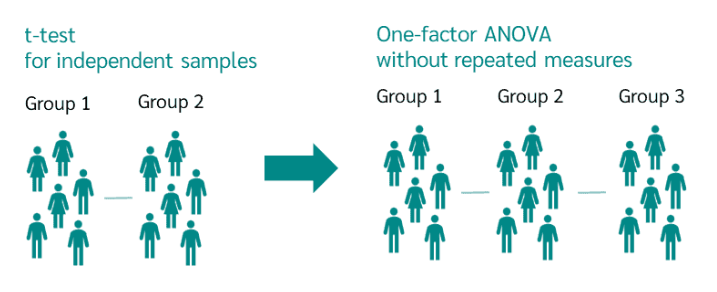

- **Analysis of Variance Test (ANOVA)**: <a id='ANOVA'></a>
- Tests whether the means of two or more independent samples are significantly different.
   - Assumptions:
     - Observations in each sample are independent and identically distributed (iid).
     - Observations in each sample are normally distributed or each 
group has more than 15 or 20 observations
     - Observations in each sample have the same variance.
     - Groups should have roughly equal variances or use Welch’s 
ANOVA

   - Interpretation:
     - H0: the means of the samples are equal.
     - H1: one or more of the means of the samples are unequal.

In [72]:
import pandas as pd
strength= pd.read_csv('OneWayExample.csv')
strength

Strength1  Strength2  Strength3  Strength4
0  11.715501  10.566155  10.283346   6.903486
1  11.981569  13.455359  12.177732   8.990110
2   8.043929   7.418840  10.559808   6.971273
3  10.558160  12.031314   9.655187   9.160390
4  14.079463   7.776633   8.790275   8.678426
5  10.776867  10.748939  10.862457  11.443832
6   7.860270  10.726980  10.378184  10.780441
7  11.889672   4.477291  10.188052   5.666760
8  11.942314   6.803820  11.624520  10.776041
9  13.177454   5.371892  12.305905   9.008765

In [73]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
stat, p = f_oneway(strength['Strength1'], strength['Strength2'], strength['Strength3'], strength['Strength4'])
print('F_stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print(' the means of the samples are equal.')
else:
 print('the means of the samples are unequal')

F_stat=3.303, p=0.031
the means of the samples are unequal


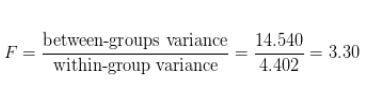
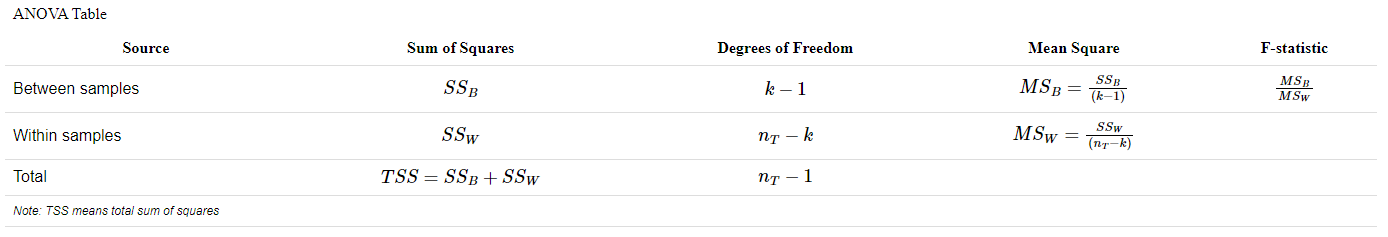
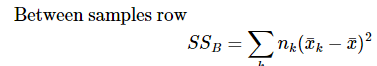
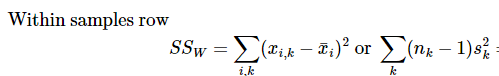
To conclude that the group means are not equal, you want low within group variance. Why? The within-group variance represents the variation that the model does not explain. Statisticians refer to this as random error. As the error increases, it becomes more likely that the 
observed differences between group means are caused by the error 
rather than by actual differences at the population level. Obviously, 
you want low amounts of error!

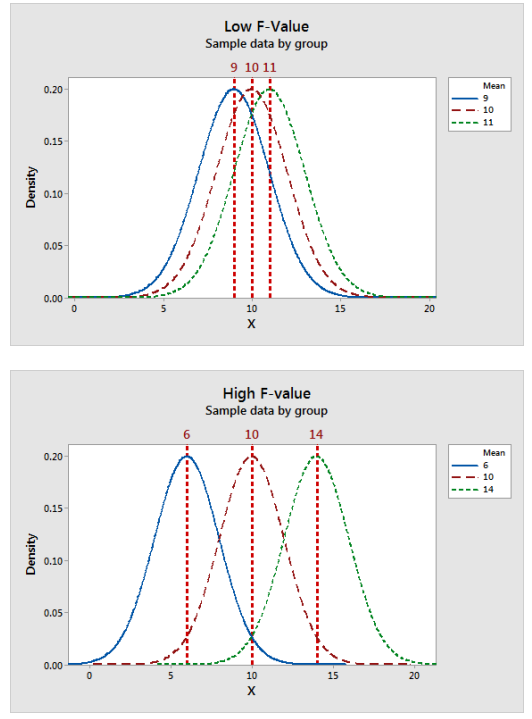

#### Note:
- Low F-value graph: The group means cluster together more 
tightly than the within-group variability. The distance between the means is small relative to the random error within 
each group. You can’t conclude that these groups are truly different at the population level.
- High F-value graph: The group means spread out more than 
the variability of the data within groups. In this case, it becomes more likely that the observed differences between 
group means reflect differences at the population level
- A tricky thing about F-values is that they are a unitless statistic, which 
makes them hard to interpret. Our F-value of 3.30 indicates that the 
between-groups variance is 3.3 times the size of the within-group variance. The null hypothesis value is that variances are equal, which produces an F-value of 1.
- Our goal is to evaluate whether our sample F-value is so rare that it 
justifies rejecting the null hypothesis for the entire population. We’ll 
calculate the probability of obtaining an F-value that is at least as high 
as our study’s value (3.30).

# Using Post Hoc Tests with ANOVA
<a id='POSTHOC'></a>

Note:
- Use post hoc tests to explore differences between multiple group means while controlling the experiment-wise error rate
- Typically, when you want to determine whether three or more means are different, you’ll perform ANOVA. Statisticians refer to the ANOVA F-test as an omnibus test. An omnibus test provides overall results for your data. Collectively, are the differences between the means statistically significant—Yes or No?
- What is this experiment-wise error rate? For every hypothesis test you perform, there is a type I error rate, which your significance level (alpha) defines. In other words, there’s a chance that you’ll reject a null hypothesis that is actually true—a false positive. When you perform only one test, the type I error rate equals your significance level, which is often 5%. However, as you conduct more and more tests, your chance of a false positive increases. If you perform enough tests, you’re virtually guaranteed to get a false positive! The error rate for a family of tests is always higher than an individual test
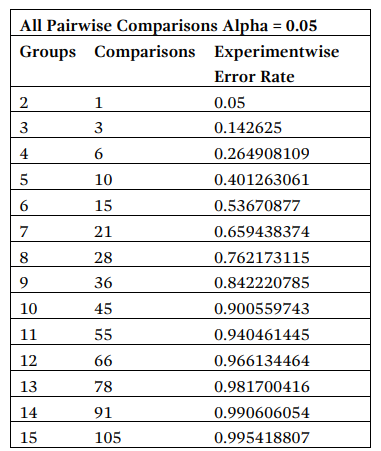
- The formula for the maximum number of comparisons you can make for N groups is: (N*(N-1))/2. The total number of comparisons is the family of comparisons for your experiment when you compare all possible pairs of groups (i.e., all pairwise comparisons). Additionally, the formula for calculating the error rate for the entire set of comparisons is 1 – (1 – α)^C. Alpha is your significance level for a single comparison, and C equals the number of comparisons

#### Post Hoc Tests Control the Experiment-wise Error Rate
- For these tests, you set the experiment-wise error rate you want for the entire set of comparisons. Then, the post hoc test calculates the significance level for all individual comparisons that produces the familywise error rate you specify.
- Post hoc tests control the experiment-wise error rate by reducing the statistical power of the comparisons
- Tukey’s Method: As the number of comparisons increases, the post hoc analysis must lower the individual significance level even further. For our six comparisons, Tukey’s method uses an individual significance level of approximately 0.011 to produce the family-wise error rate of 0.05. If our ANOVA required more comparisons, it would be even lower. Lower significance levels correspond to lower statistical power

In [74]:
strength2= pd.read_csv('PostHocTests.csv')
strength2

Material  Strength
0         B      37.9
1         C      36.0
2         D      38.0
3         A      40.0
4         A      36.9
5         C      39.4
6         A      33.4
7         B      26.2
8         B      24.9
9         B      30.3
10        D      40.8
11        B      32.6
12        D      45.9
13        D      40.4
14        C      36.3
15        A      42.3
16        A      39.1
17        C      29.5
18        A      34.7
19        D      39.9
20        D      41.4
21        C      34.9
22        B      37.5
23        C      39.8

In [75]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=strength2['Strength'],
                          groups=strength2['Material'],
                          alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  -6.1667 0.0606 -12.5499  0.2166  False
     A      C    -1.75 0.8681  -8.1333  4.6333  False
     A      D   3.3333 0.4779  -3.0499  9.7166  False
     B      C   4.4167  0.245  -1.9666 10.7999  False
     B      D      9.5 0.0025   3.1167 15.8833   True
     C      D   5.0833 0.1495  -1.2999 11.4666  False
-----------------------------------------------------


1. The adjusted p-value identifies the group comparisons that are significantly different while limiting the family error rate to your significance level. Simply compare the adjusted p-values to your significance 
level. When adjusted p-values are less than the significance level, the 
difference between those group means is statistically significant. In the output above, only the D – B difference is statistically significant while using a family error rate of 0.05. The mean difference between these two groups is 9.5.
2. With a 95% simultaneous 
confidence level, we can be 95% confident that all intervals in our set 
of comparisons contain the actual population differences between 
groups. 

#### Dunnett’s Compares Treatments to a Control 
<a id='DUNNETT'></a>
- If your study has a control group and several treatment groups, you 
might need to compare the treatment groups only to the control 
group
- Use Dunnett’s method when the following are true:
   - Before the study, you know which group (control) you want to compare to all the other groups (treatments).
   - You don’t need to compare the treatment groups to each other.
   
#### Step 1: Dunnett’s Critical value: $t_{d}\sqrt(2MS_{w}/n)$
- td: The value found in Dunnett’s Table for a given alpha level, number of groups, and group sample sizes.
- MSw: The Mean Squares of the “Within Group” in the ANOVA output table
- n: The size of the group samples

#### Step 2: Calculation:
- calculate the absolute difference between the mean of each group with the mean of the control group. If the difference exceeds Dunnett’s critical value, then that difference is said to be statistically significant.

In [76]:
t= 3.1 # from table
import numpy as np
import pandas as pd

In [77]:
dunett= pd.read_csv('PostHocTests - Copy.csv')
dunett

A     B     C     D
0  40.0  37.9  36.0  38.0
1  36.9  26.2  39.4  40.8
2  33.4  24.9  36.3  45.9
3  42.3  30.3  29.5  40.4
4  39.1  32.6  34.9  39.9
5  34.7  37.5  39.8  41.4

In [78]:
msw= (5*(np.var(dunett['A'])) +5*(np.var(dunett['B'])) + 5*(np.var(dunett['C']))+ 5*(np.var(dunett['D'])))/(24-4)
critical_value= t* np.sqrt((2*msw)/6)
critical_value

6.453871236334452

In [79]:
np.mean(dunett['A']) # control group

37.73333333333334

In [80]:
print(np.mean(dunett['A'])-np.mean(dunett['B']), np.mean(dunett['A'])- np.mean(dunett['C']), np.mean(dunett['A'])-np.mean(dunett['D']))

6.166666666666675 1.7500000000000142 -3.3333333333333286


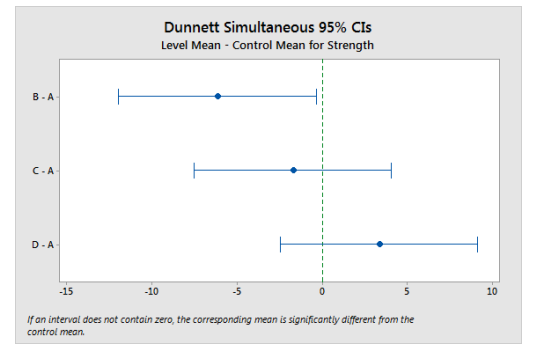

Using Dunnett’s method, we see that only the B – A difference is statistically significant because the interval does not include zero. Using 
Tukey’s method, this comparison was not significant. The additional 
power gained by making fewer comparisons came through for us. On 
the other hand, unlike Tukey’s method, Dunnett’s method does not 
find that the D – B difference is significant because it doesn’t compare 
the treatment groups to each other.

#### Hsu’s MCB to Find the Best <a id='HSU'></a>
- Use Hsu’s MCB when you:
   - Don’t know in advance which group you want to compare to all the other groups.
   - Don’t need to compare groups that are not the best to other groups that are not the best.
   - Can define “the best” as either the group with the highest mean or the lowest mean.

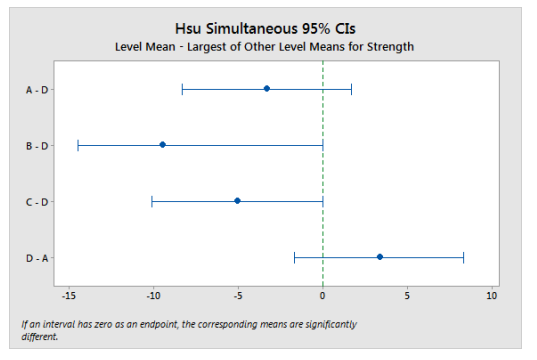

Group D is the best group overall because it has the highest mean 
(41.07). The procedure compares D to all the other groups. For Hsu’s 
MCB, a group is significantly better than another group when the confidence interval has zero as an endpoint. From the graph, we can see that Material D is significantly better than B and C. However, the A-D 
comparison contains zero, which indicates that A is not significantly 
different from the best.
Hsu’s MCB determines that the candidates for the best group are A 
and D. D has the highest sample mean and A is not significantly different from D. On the other hand, the procedure effectively rules out 
B and C from being the best

#### Two-Way ANOVA <a id='2ANOVA'></a>
- Assumptions:For reliable Two-Way ANOVA results, your data should satisfy the following assumptions:
  - The outcome or dependent variable is continuous.
  - You have two categorical independent variables (factors)
- In two-way ANOVA, assumptions focus on the residuals rather than the raw data. A residual for an observation in two-way ANOVA equals the actual value of the dependent variable minus the group mean for that observation. In other words, it’s the difference between the observed value and the value that the model predicts. Residual plots graph all the residuals for a model, which allows you to evaluate them.
- In residual plots, you want to see a random scatter of points around zero and an even spread throughout. If you see patterns or a fanning of values (non-constant variance), the two-way ANOVA models do not satisfy the assumptions. Additionally, look for data points that are far from zero because they are outliers that can significantly affect the results.
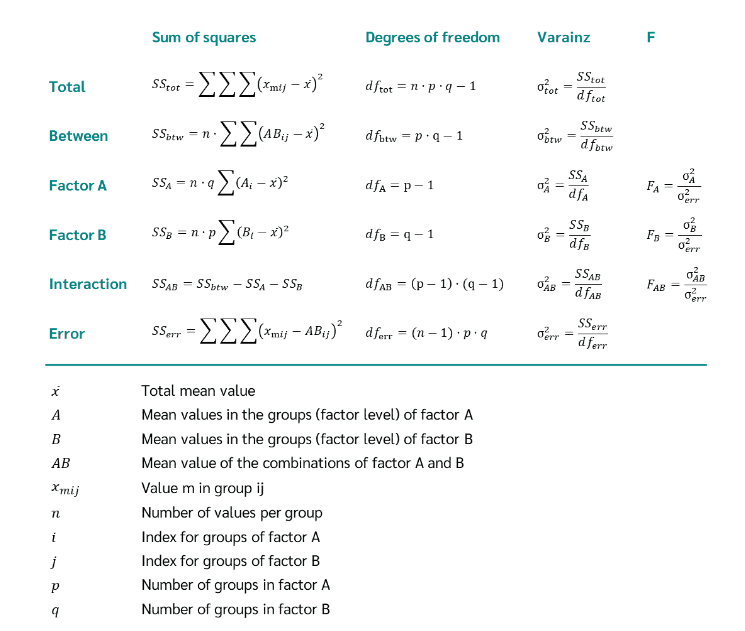

In [81]:
anova= pd.read_csv('Two-WayANOVAExamples.csv')
anova

Gender       Major       Income  Unnamed: 3     Food Condiment  Enjoyment
0      Male  Statistics  78504.55540         NaN  Hot Dog   Mustard  81.926957
1      Male  Statistics  76268.90888         NaN  Hot Dog   Mustard  84.939774
2      Male  Statistics  66657.85452         NaN  Hot Dog   Mustard  90.286479
3      Male  Statistics  78026.35568         NaN  Hot Dog   Mustard  89.561802
4      Male  Statistics  83485.21734         NaN  Hot Dog   Mustard  97.676826
..      ...         ...          ...         ...      ...       ...        ...
115  Female  Psychology  62475.94497         NaN      NaN       NaN        NaN
116  Female  Psychology  70659.17465         NaN      NaN       NaN        NaN
117  Female  Psychology  73898.34254         NaN      NaN       NaN        NaN
118  Female  Psychology  66799.27866         NaN      NaN       NaN        NaN
119  Female  Psychology  61406.22404         NaN      NaN       NaN        NaN

[120 rows x 7 columns]

In [82]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Performing two-way ANOVA on income vs gender, major
model = ols('Income ~ C(Gender) + C(Major) +C(Gender):C(Major)',
            data=anova[['Income', 'Gender', 'Major']]).fit()
result = sm.stats.anova_lm(model, type=2)
  
# Print the result
print(result)

                       df        sum_sq       mean_sq           F  \
C(Gender)             1.0  5.930022e+08  5.930022e+08   25.795022   
C(Major)              2.0  6.009141e+09  3.004570e+09  130.695897   
C(Gender):C(Major)    2.0  8.823224e+07  4.411612e+07    1.919008   
Residual            114.0  2.620748e+09  2.298902e+07         NaN   

                          PR(>F)  
C(Gender)           1.495670e-06  
C(Major)            3.147345e-30  
C(Gender):C(Major)  1.514633e-01  
Residual                     NaN  


First, look in the P-value column in the Analysis of Variance table. Because the p-values for both Gender and Major are less than our significance level, these factors are statistically significant. These are the 
main effects in the model. 
On the other hand, the interaction effect (Gender*Major) is not significant because its p-value (0.151) is greater than our significance 
level. Because the interaction effect is not significant, we can focus on 
only the main effects.

# Nonparametric Statistical Hypothesis Tests <a id='NP'></a>
- If the data does not have the familiar Gaussian distribution, we must resort to nonparametric version of the significance tests. These tests operate in a similar manner, but are distribution free, requiring that real valued data be first transformed into rank data before the test can be performed.
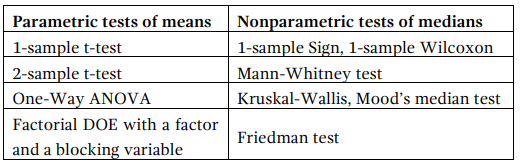

- **Mann-Whitney U Test**:<a id='MWUT'></a>
    - Tests whether the distributions of two independent samples are equal or not.
    - Assumptions: 
      - Observations in each sample are independent and identically distributed (iid).
      - Observations in each sample can be ranked.
    - Interpretation:
      - H0: the distributions of both samples are equal.
      - H1: the distributions of both samples are not equal.
    - The Mann-Whitney U test is a non-parametric version of the t-test for independent samples. When the means of samples from the populations are normally distributed, consider scipy.stats.ttest_ind.


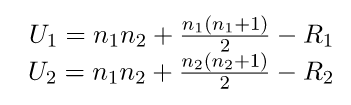
where:
n1: number of samples in sample 1
n2: number of samples in sample 2
R1: Rank sum of sample 1
R2: Rank sum of sample 2
Now, our test statistic (U) will be smaller of U1 and U2.
Now, we look to the critical values in the table with respect to n1 and n2 (take it U0).
if U <= U0 : we reject the null hypothesis.
else, we do not reject the null hypothesis.

In [83]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=40.000, p=0.473
Probably the same distribution


In [84]:
import pandas as pd
median_test= pd.read_csv('BattleSexes.csv')
median_test.dropna(inplace=True)
median_test

Female_Multitask  Male_Multitask  Parallel_Parking  Gender
0             100.0            50.0                90  Female
1              70.0            80.0                 0  Female
2              60.0            50.0                68  Female
3              80.0            80.0                18  Female
4              80.0            90.0                63  Female
5              80.0            80.0                72  Female
6              80.0            50.0                16  Female
7              60.0            60.0                14  Female
8              50.0            50.0                61  Female
9              60.0            50.0                23  Female

In [85]:
# code for Mann-Whitney U test
from scipy.stats import mannwhitneyu
# Take batch 1 and batch 2 data as per above example
batch_1 =median_test['Female_Multitask']
batch_2 =median_test['Male_Multitask']
  
# perform mann whitney test
stat, p_value = mannwhitneyu(batch_1, batch_2)
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=65.00, p=0.25
Do not Reject Null Hypothesis (No significant difference between two samples)


In [86]:
import numpy as np
from scipy import stats
def non_param_unpaired_CI(sample1, sample2, conf):
    n1 = len(sample1)  
    n2 = len(sample2)  
    alpha = 1-conf      
    N = stats.norm.ppf(1 - alpha/2) 

  # The confidence interval for the difference between the two population
  # medians is derived through the n x m differences.
    diffs = sorted([i-j for i in sample1 for j in sample2])
  
  # the Kth smallest to the Kth largest of the n x m differences then determine 
  # the confidence interval, where K is:
    k = np.math.ceil(n1*n2/2 - (N * (n1*n2*(n1+n2+1)/12)**0.5))
  
    CI = (round(diffs[k-1],3), round(diffs[len(diffs)-k],3))
    return CI

In [87]:
non_param_unpaired_CI(sample1=median_test['Female_Multitask'], sample2=median_test['Male_Multitask'], conf= 0.95)

(-10.0, 30.0)

The p-value is 0.2542 and the confidence interval contains zero. Both 
conditions indicate that the test results are not significant. We have 
insufficient evidence to conclude that the women’s median score is 
greater than the men’s median. The confidence interval contains negative values, which tell us that we should not be surprised if a replicate 
study found that men had a higher median!

- **Wilcoxon Signed-Rank Test**: <a id='WSRT'></a>
    - Tests whether the distributions of two paired samples are equal or not.
    - Assumptions: 
      - Observations in each sample are independent and identically distributed (iid).
      - Observations in each sample can be ranked.
      - Observations across each sample are paired.
    - Interpretation:
      - H0: the distributions of both samples are equal.
      - H1: the distributions of both samples are not equal.
    - In the following, let d represent the difference between the paired samples: d = x - y if both x and y are provided, or d = x otherwise. Assume that all elements of d are independent and identically distributed observations, and all are distinct and nonzero.
      - When len(d) is sufficiently large, the null distribution of the normalized test statistic (zstatistic above) is approximately normal, and method = 'approx' can be used to compute the p-value.
      - When len(d) is small, the normal approximation may not be accurate, and method='exact' is preferred (at the cost of additional execution time).
      - The default, method='auto', selects between the two: when len(d) <= 50, the exact method is used; otherwise, the approximate method is used.

In [88]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=21.000, p=0.557
Probably the same distribution


- **Kruskal-Wallis H Test**:<a id='KWHT'></a>
  - Tests whether the distributions of two or more independent samples are equal or not.
  - The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between groups are required to determine which groups are different.
    - Assumptions: 
      - Observations in each sample are independent and identically distributed (iid).
      - Observations in each sample can be ranked.
    - Interpretation:
      - H0: the distributions of all samples are equal.
      - H1: the distributions of one or more samples are not equal.

In [89]:
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=0.571, p=0.450
Probably the same distribution


- **Friedman Test**:<a id='FT'></a>
- Tests whether the distributions of two or more paired samples are equal or not.
    - Assumptions: 
      - Observations in each sample are independent and identically distributed (iid).
      - Observations in each sample can be ranked.
      - Observations in each sample can be ranked.
      - Due to the assumption that the test statistic has a chi squared distribution, the p-value is only reliable for n > 10 and more than 6 repeated samples.
    - Interpretation:
      - H0: the distributions of all samples are equal.
      - H1: the distributions of one or more samples are not equal.
    - The Friedman test tests the null hypothesis that repeated samples of the same individuals have the same distribution. It is often used to test for consistency among samples obtained in different ways. For example, if two sampling techniques are used on the same set of individuals, the Friedman test can be used to determine if the two sampling techniques are consistent.

In [90]:
# Example of the Friedman Test
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=0.800, p=0.670
Probably the same distribution


# Mean <a id='MEANS'></a>

1. **Arithmetic mean (AM)**
Sum of the sampled values divided by the number of samples.
$\bar{x}=\frac{1}{n}\sum_{i=1}^{n} x_i$

2. **Geometric mean (GM)**
This can be used for sets of positive numbers.
$\bar{x} = \Bigl(\Pi_{i=1}^{n} x_i \Bigr)^{\frac{1}{n}}$
- Geometric mean is less sensitive to one outlier compared to the arithmetic mean. GM changes its value bacause of the outlier, but does not change by orders of magnitude.

In [117]:
from scipy.stats.mstats import gmean
num_list = np.array([3,1,5,5,8,2,4])
num_list_mod=np.append(num_list,10000)

In [118]:
print("AM without the outlier (1000):", np.mean(num_list))
print("AM with the outlier (1000):", np.mean(num_list_mod))
print("GM without the outlier (1000):", gmean(num_list))
print("GM with the outlier (1000):", gmean(num_list_mod))

AM without the outlier (1000): 4.0
AM with the outlier (1000): 1253.5
GM without the outlier (1000): 3.356538286432562
GM with the outlier (1000): 9.123367196696424


3. **Harmonic mean (HM)**
The harmonic mean is useful for sets of numbers which are defined in a specific unit, e.g., speed (distance per unit of time).
$\bar{x}=\frac{n}{\sum_{i=1}^{n}\frac{1}{x_i}}$

In [119]:
from scipy.stats import hmean

In [120]:
hmean(num_list)

2.6837060702875397

# Bootstrapping <a id='BOOTSTRAPPING'></a>
- It is **sampling with replacement**. 
- Using random.choice in Python actually samples in this way. 
- Where the probability of any number in our set stays the same regardless of how many times it has been chosen. Flipping a coin and rolling a die is like bootstrap sampling as well, as rolling a 6 in one scenario doesn't mean that 6 is less likely later.
- Bootstrapping resamples the original dataset with replacement many 
thousands of times to create simulated datasets. This process involves 
drawing random samples from the original dataset. Here’s how it 
works:
1. The bootstrap method has an equal probability of randomly 
drawing each original data point for inclusion in the 
resampled datasets.
2. The procedure can select a data point more than once for a 
resampled dataset. This property is the “with replacement” 
aspect of the process.
3. The procedure creates resampled datasets that are the same 
size as the original dataset.
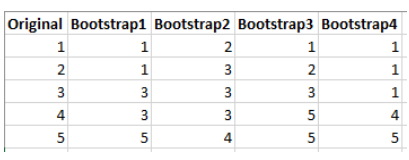

In [2]:
import seaborn as sns
df = sns.load_dataset('iris') 
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [15]:
import numpy as np
from matplotlib import pyplot as plt
x = df['sepal_length'].values
x

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

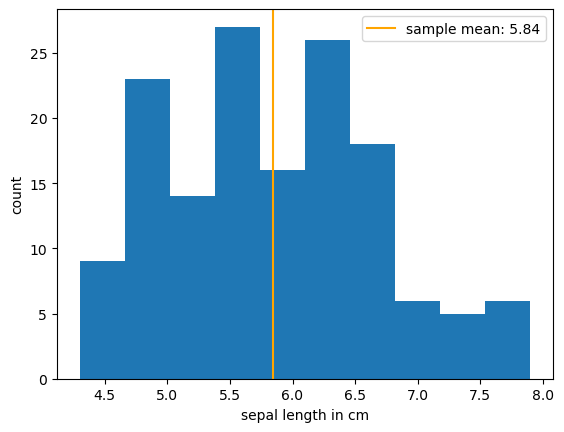

In [12]:
x_mean = np.mean(x)
plt.hist(x, bins=10)
plt.axvline(x_mean, color='orange', label='sample mean: %.2f' % x_mean)
plt.xlabel('sepal length in cm')
plt.ylabel('count')
plt.legend(loc=1)

In [5]:
se = np.std(x, ddof=1) / np.sqrt(x.shape[0])
print('standard error', se)

standard error 0.0676113162275986


In [9]:
import scipy.stats 
scipy.stats.sem(x)

0.0676113162275986

**Bootstrapping and estimating the population mean**

In [10]:
def bootstrap_means(x, n_bootstrap_samples, seed=None):

    rng = np.random.RandomState(seed)
    sample_means = np.zeros(shape=n_bootstrap_samples)
    
    for i in range(n_bootstrap_samples):
        boot_sample = rng.choice(x, size=x.shape[0], replace=True)
        # replicate is a general term for a statistic computed
        # from a bootstrap sample
        bootstrap_replicate = np.mean(boot_sample)
        sample_means[i] = bootstrap_replicate
    return sample_means

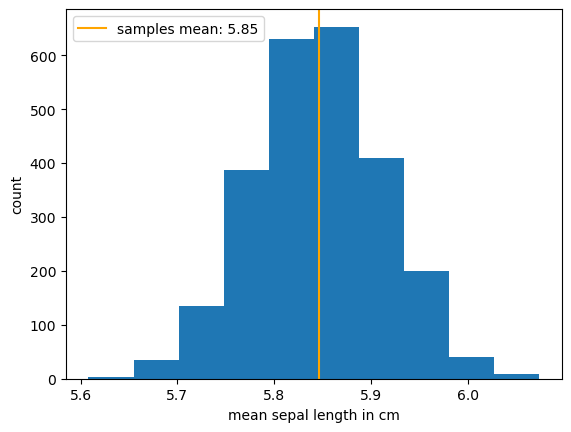

In [17]:
boot_2500 = bootstrap_means(x, n_bootstrap_samples=2500, seed=123)

boot_mean = np.mean(boot_2500)
plt.hist(boot_2500, bins=10)
plt.axvline(boot_mean, color='orange', label='samples mean: %.2f' % boot_mean)
plt.xlabel('mean sepal length in cm')
plt.ylabel('count')
plt.legend(loc=2)
plt.show()

In [18]:
np.std(boot_2500, ddof=1)

0.06666436312360136

**From the original data (i.e., from a single sample):**

In [19]:
def confidence_interval(x, ci=0.95):
    x_mean = np.mean(x)
    se = np.std(x, ddof=1) / np.sqrt(x.shape[0])
    h = se * scipy.stats.t._ppf((1 + ci)/2. , x.shape[0])
    return x_mean - h, x_mean + h

lower, upper = confidence_interval(x, ci=0.95)


print('95%% confidence interval: [%.2f, %.2f]' % (lower, upper))

95% confidence interval: [5.71, 5.98]


**From bootstrap replicates:**

In [20]:
lower, upper = np.percentile(boot_2500, [2.5, 97.5])

print('95%% confidence interval: [%.2f, %.2f]' % (lower, upper))

95% confidence interval: [5.72, 5.98]


# 9. Normal Distribution
<a id='NORMAL'></a>

- Gaussian distribution with 2 parameters: mean and variance.
- Symmetric distribution whose meam, median, and mode are the same.
- $f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{\bigl({-\frac{1}{2}}\bigl(\frac{x-\mu}{\sigma} \bigr)^2  \bigr)},$
where μ is the mean of the distribution, σ is the standard deviation. Here, μ can be median or mode as well.
- The variance of the distribution is $σ^2$.
- The normal distribution is important because of the central limit theorem.
- Standard normal distribution: The simplest case of the normal distribution (mean = 0, standard deviation = 1).

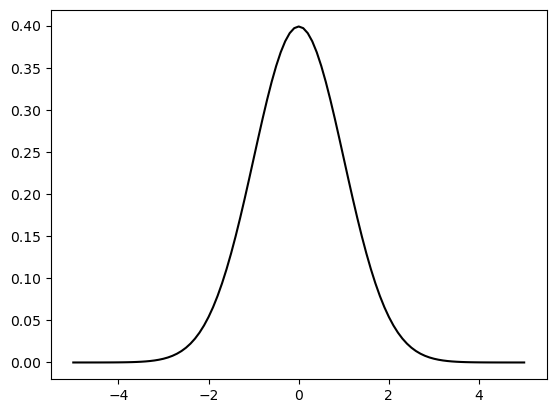

In [3]:
def standard_norm_pdf(x): #Standard normal distribution
    return np.exp(-0.5 * x**2 )/np.sqrt(2*np.pi)

x = np.linspace(-5,5,101)
plt.plot(x,standard_norm_pdf(x), 'k')

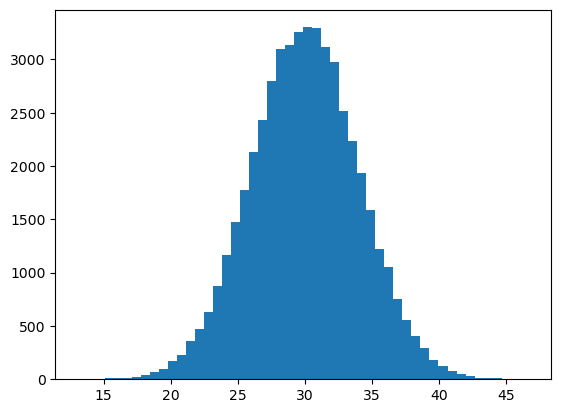

obtained mean = 30.02 / exact mean = 30.00
obtained median = 30.02 / exact median = 30.00
obtained variance = 16.02 / exact mean = 16.00


In [4]:
mu, sigma = 30, 4 # mean and standard deviation
num_samples=50000

np.random.seed(1)
s = np.random.normal(mu, sigma, num_samples) # generate random numbers that follow normal distribution
#Draw random samples from a normal (Gaussian) distribution.
plt.hist(s,bins=50)
plt.show()

print("obtained mean = %0.2f / exact mean = %0.2f"%(np.mean(s),mu))
print("obtained median = %0.2f / exact median = %0.2f"%(np.median(s),mu))
print("obtained variance = %0.2f / exact mean = %0.2f"%(np.var(s),sigma**2))

# Useful commands
<a id='COMMANDS'></a>

1. #### Cumulative density function 
- Find the probability of a specific point.
- If you want to find the probability at the point of -1, you can type: `t.cdf(-0.1, df)`
- The probability of all outcomes less than or equal to a given value x. Graphically, this is the the total area of everything less than or equal to x (**the total area of the left of x**)


2. #### Percent point function 
- Find the point where you can get specific probability.
-  Specifically, the PPF returns the exact point where the probability of everything to the left is equal to y
- This can be thought of as the percentile function since the PPF tells us the value of a given percentile of the data.
- If you want to find the point which gives the probability of 0.1 with the specific degree of freedom, df, you can type: `t.ppf(0.1, df)`

A simple binomial distribution that is easy to understand is a binomial distribution with n=2 and p=0.5 (two events, each with a 50% chance of success, like flipping a coin two times and finding out how many times we get heads)

In [5]:
from scipy.stats import binom
COIN = binom(n=2, p=0.5)
COIN

In [6]:
COIN.cdf(2) #asks "what percentage of results have 2 or fewer heads?"

1.0

In [7]:
COIN.ppf(0.99) #asks "what is the 99%-tile of heads?

2.0

In [ ]:
# Importing the library
# The .cdf() function calculates the probability for a given normal distribution value
import scipy.stats

# Determine p-value in a two-tailed test
print((1-(scipy.stats.norm.cdf(1.94)))*2)

# Determine p-value in right-tailed test
print(1-(scipy.stats.norm.cdf(1.94)))

# Determine p-value for the left-tailed test
print(scipy.stats.norm.cdf(1.94))

# Errors<a id='errors'></a>

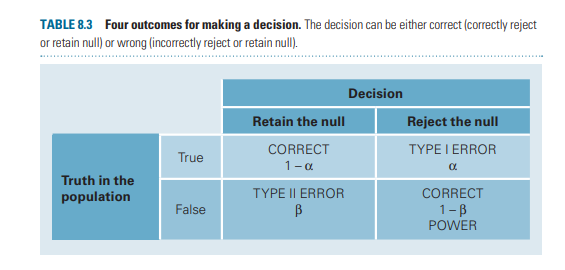
- When we decide to retain the null hypothesis, we can be correct or incorrect. The 
correct decision is to retain a true null hypothesis. This decision is called a null 
result or null finding. This is usually an uninteresting decision because the decision is to retain what we already assumed: that the value stated in the null hypothesis is correct. For this reason, null results alone are rarely published in behavioral 
research
- The incorrect decision is to retain a false null hypothesis. This decision is an 
example of a **Type II error, or  β error**. With each test we make, there is always 
some probability that the decision could be a Type II error. In this decision, we 
decide to retain previous notions of truth that are in fact false. While it’s an error, 
we still did nothing; we retained the null hypothesis. We can always go back and 
conduct more studies
- **Type I error**: When we mistakenly reject a null hypothesis that’s actually true. The probability of making a Type I error is given by α, which is the same as the level of significance for the hypothesis test.
  - Type I error is the probability of rejecting a null hypothesis that is actually true. Researchers directly control for the probability of committing this type of error.
  - An alpha (a) level is the level of significance or criterion for a hypothesis test. It is the largest probability of committing a Type I error that we will allow and still decide to reject the null hypothesis
  - Since we assume the null hypothesis is true, we control for Type I error by stating a level of significance. The level we set, called the alpha level (symbolized as a), is the largest probability of committing a Type I error that we will allow and still decide to reject the null hypothesis. This criterion is usually set at .05 (a = .05), and we compare the alpha level to the p value. When the probability of a Type I error is less than 5% (p < .05),we decide to reject the null hypothesis; otherwise, we retain the null hypothesis
- A **Type III error** occurs with one-tailed tests, where the researcher decides to retain 
the null hypothesis because the rejection region was located in the wrong tail.
The “wrong tail” refers to the opposite tail from where a difference was 
observed and would have otherwise been significant.
- **Graphing Type I and Type II Errors**
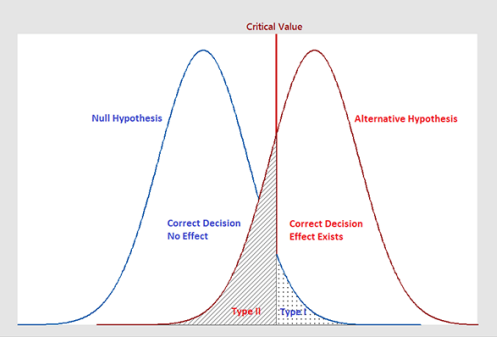
- The distribution on the left represents the null hypothesis. When the 
null hypothesis is correct, you only need to worry about Type I errors, 
which is the shaded portion of the null hypothesis distribution. The 
rest of the null distribution shows the correct decision of failing to 
reject the null.
- On the other hand, when the alternative hypothesis is right, you need 
to worry about Type II errors. The shaded region on the alternative 
hypothesis distribution represents the Type II error rate. The rest of 
the alternative distribution depicts the probability of correctly detecting an effect— which is statistical power.
- Moving the critical value line is equivalent to changing the significance level. If you move the line to the left, you’re increasing the significance level (e.g., α 0.05 to 0.10). Holding everything else constant, 
this adjustment increases the Type I error rate while reducing the 
Type II error rate. Moving the line to the right reduces the significance 
level (e.g., α 0.05 to 0.01), which decreases the Type I error rate but 
increases the type II error rate.

**Power**:<a id='power'></a> 
- The probability that we’ll reject the null hypothesis when it’s false (which is the correct thing to do). This is what we want, so we want our test to have a high power.
  - The correct decision is to reject a false null hypothesis. There is always some 
probability that we decide that the null hypothesis is false when it is indeed false. This 
decision is called the power of the decision-making process. It is called power because 
it is the decision we aim for. Remember that we are only testing the null hypothesis 
because we think it is wrong.
- Power is the ability of the test to detect 
an effect that exists in the population. In other words, the test correctly rejects a false null hypothesis. 
For example, if your study has 80% power, it has an 80% chance of 
detecting an effect that exists. 
- Power analysis helps you manage an essential tradeoff. As you increase the sample size, the hypothesis test gains a greater ability to detect small effects. This situation sounds fantastic. However, larger sample sizes cost more money. And, there is a point where an effect becomes so miniscule that it is meaningless in a practical sense.
- To increase the power of detecting an effect in a given population:
   - a. Increase effect size (d), sample size (n), and alpha (a).
   - b. Decrease beta error (b), population standard deviation (s), and standard error (sM)
- 2-Sample t-Test Power Analysis for Sample Size
   - Differences: use your expertise to identify the smallest difference that is still meaningful for your application
   - Power values :Power values is where we specify the probability that the hypothesis test detects the difference in the sample if that difference exists in the population. The proper value to enter in this field depends on norms in your study area or industry. Common power values are 0.8 and 0.9. We’ll enter a power of 0.9 so that the 2-sample t-test has a 90% chance of detecting a difference of 5.
   - Standard deviation: Standard deviation is the field where we enter the data variability. We need to enter an estimate for the standard deviation 

In [4]:
from math import sqrt
from statsmodels.stats.power import TTestIndPower
# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=(5/4), alpha=0.05, power=0.9,   #effect size is Cohen's d
                    ratio=1, alternative='two-sided')
  
print('Sample size/Number needed in each group: {:.3f}'.format(n))

Sample size/Number needed in each group: 14.481


#### How Low Statistical Power Biases the Estimates
  - When we assess both the significant and non-significant studies together, the estimated effect is an unbiased estimator of the actual population effect. However, when we evaluate only the statistically significant results, the estimated effect is a biased estimator.
  - low power inflate effect sizes
  - Control group: Normal distribution with a mean of 100 and a standard deviation of 15.
  - Treatment group: Normal distribution with a mean of 110 and a standard deviation of 15.

In [4]:
from math import sqrt
from statsmodels.stats.power import TTestIndPower
# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=(10/15), alpha=0.05, power=0.3,   #effect size is Cohen's d
                    ratio=1, alternative='two-sided')
  
print('Sample size/Number needed in each group: {:.3f}'.format(n))
from math import sqrt
from statsmodels.stats.power import TTestIndPower
# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=(10/15), alpha=0.05, power=0.55,   #effect size is Cohen's d
                    ratio=1, alternative='two-sided')
  
print('Sample size/Number needed in each group: {:.3f}'.format(n))
from math import sqrt
from statsmodels.stats.power import TTestIndPower
# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=(0.02), alpha=0.05, power=0.8,   #effect size is Cohen's d
                    ratio=1, alternative='two-sided')
  
print('Sample size/Number needed in each group: {:.3f}'.format(n))

Sample size/Number needed in each group: 10.292
Sample size/Number needed in each group: 20.573
Sample size/Number needed in each group: 39245.264


Now, I’ll use statistical software to draw 50 random samples from the 
two populations for each of the sample sizes in the power analysis. 
Finally, I perform 2-sample t-tests on all datasets. I use two-tailed tests 
with a significance level of 0.05. The following discussion explains the 
results of the 50 2-sample t-tests for each of the three power levels.

#### Findings and Estimated Effect Sizes for Very Low Power (0.3)

In [124]:
#50 random samples from the two populations for each of the sample sizes in the power analysis= 0.3, sample size=10
import numpy as np

diff_means1 = []
np.random.seed(9)
for i in range(50): # 50 times 
    rand_list1 = np.random.normal(100, 15, size=10)
    rand_list2 = np.random.normal(110, 15, size=10)
    stat, p = ttest_ind(rand_list1, rand_list2, alternative='two-sided')
    if p < 0.05 or p == 0.05:
        m1= np.mean(rand_list1)
        m2= np.mean(rand_list2)
        diff_means1.append(m2-m1) # means

In [125]:
len(diff_means1)/50

0.3

In [126]:
np.mean(diff_means1)

20.784803494371886

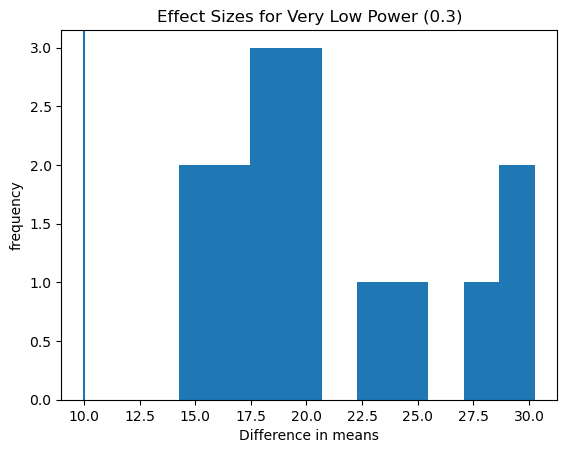

In [127]:
from matplotlib import pyplot as plt

plt.hist(x= diff_means1)
plt.title('Effect Sizes for Very Low Power (0.3)')
plt.xlabel('Difference in means')
plt.ylabel('frequency')
plt.axvline(x=10)

- Of the 50 tests with the lowest statistical power, 21% are statistically significant. The average effect size is 21 IQ points, and the range extends from 14 to 30. Not only is the average effect too high, but the entire range of effects is greater than the actual effect. The graph below displays the distribution of statistically significant findings with a reference line for the real effect (10).

#### Power = 0.55

In [130]:
#50 random samples from the two populations for each of the sample sizes in the power analysis
import numpy as np

diff_means2 = []
np.random.seed(9)
for i in range(50): # 50 times 
    rand_list1 = np.random.normal(100, 15, size=21)
    rand_list2 = np.random.normal(110, 15, size=21)
    stat, p = ttest_ind(rand_list1, rand_list2, alternative='two-sided')
    if p < 0.05 or p == 0.05:
        m1= np.mean(rand_list1)
        m2= np.mean(rand_list2)
        diff_means2.append(m2-m1) # means

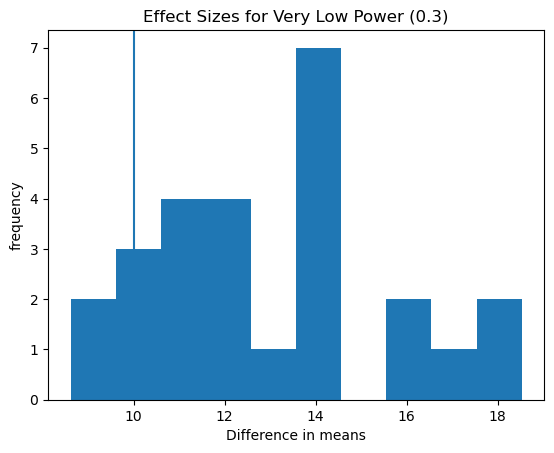

In [132]:
from matplotlib import pyplot as plt

plt.hist(x= diff_means2)
plt.title('Effect Sizes for Very Low Power (0.3)')
plt.xlabel('Difference in means')
plt.ylabel('frequency')
plt.axvline(x=10)

A large 
majority of the effects are greater than 10.


In [ ]:
Power = 0.8

In [133]:
#50 random samples from the two populations for each of the sample sizes in the power analysis
import numpy as np

diff_means3 = []
np.random.seed(9)
for i in range(50): # 50 times 
    rand_list1 = np.random.normal(100, 15, size=37)
    rand_list2 = np.random.normal(110, 15, size=37)
    stat, p = ttest_ind(rand_list1, rand_list2, alternative='two-sided')
    if p < 0.05 or p == 0.05:
        m1= np.mean(rand_list1)
        m2= np.mean(rand_list2)
        diff_means3.append(m2-m1) # means

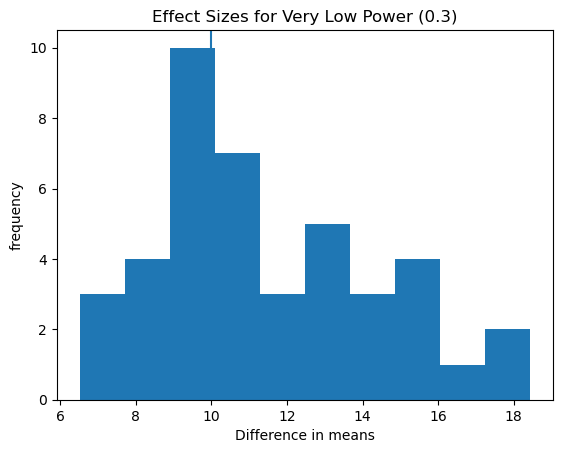

In [134]:
from matplotlib import pyplot as plt

plt.hist(x= diff_means3)
plt.title('Effect Sizes for Very Low Power (0.3)')
plt.xlabel('Difference in means')
plt.ylabel('frequency')
plt.axvline(x=10)

The real 
effect size is moving closer to the center of the distribution.


#### As the power level increases, the percentage of detections increases and the exaggeration of the effect size decreases. Both are good things and have a common cause.
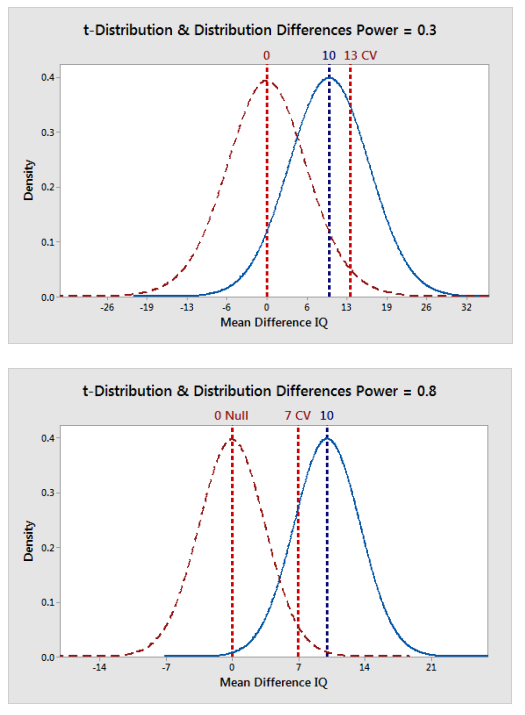
- Notice how the critical value line truncates the distribution of differences in the blue curves. All differences on the blue curve to the left 
of the red dashed CV line will not be significant. This portion of the 
blue curve represents false negatives, which statisticians refer to as
Type II errors. Consequently, those smaller effect sizes won’t be included in the calculations for the mean of the significant effect sizes. 
- The average effect must be higher than the critical value. Truncation diminishes as power increases from 0.3 to 0.8. The amount of truncation determines the degree of bias in the estimated effect amongst statistically significant results.
- The area under the blue curve to the right of the CV line represents 
the test's power because those differences will be significant. For 0.3 
statistical power, 30% of the area under the blue curve is to the right 
of the CV line. For 0.8 power, 80% is to the right of the CV line.
Higher proportions of the blue curve to the right of the CV line corresponds to a lower bias of significant effects and greater statistical 
power.

# Z test <a id='ztest'></a>

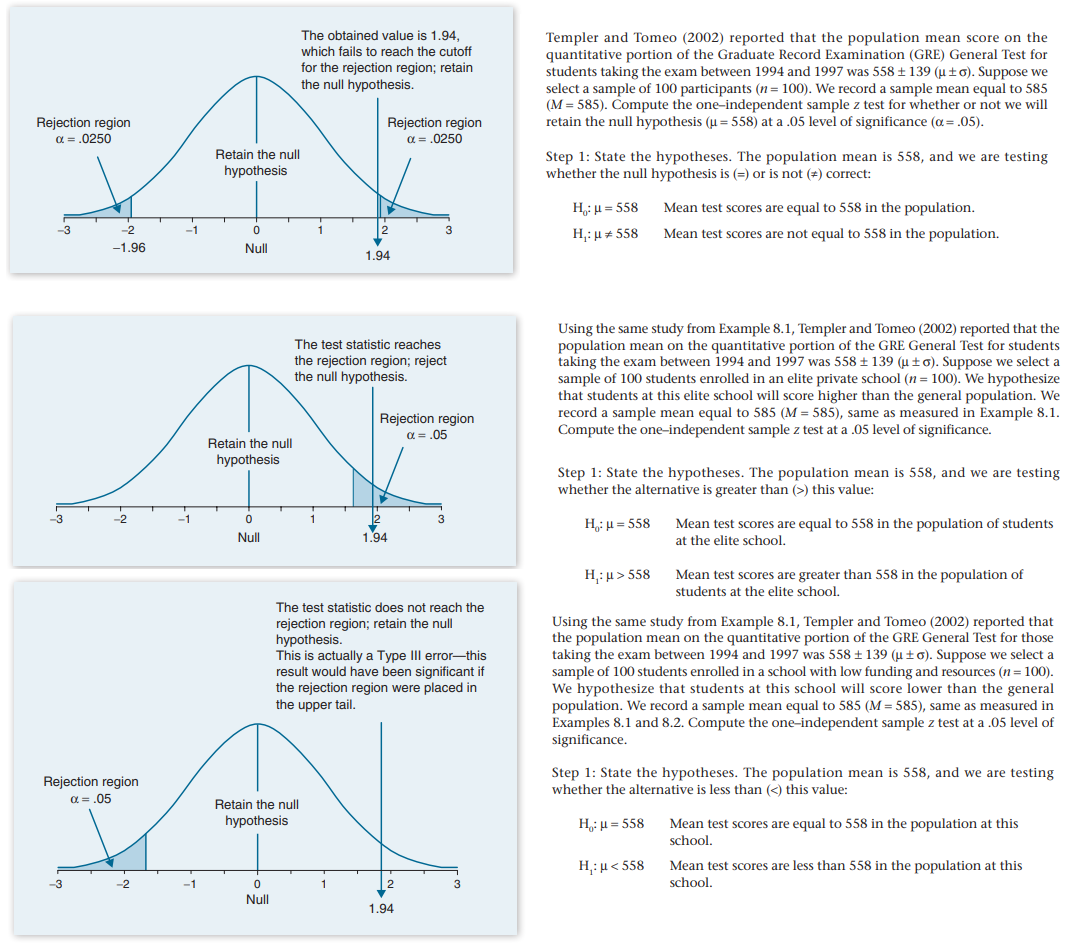

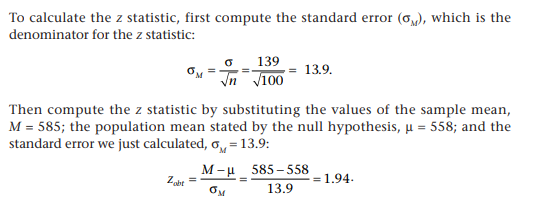

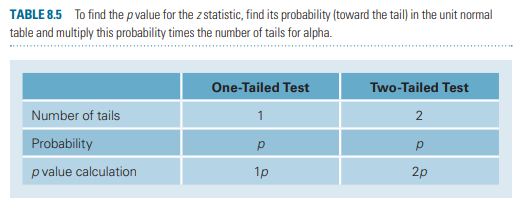

In [74]:
print(scipy.stats.norm.ppf(1-.05/2))

1.959963984540054


In [4]:
# Importing the library
# The .cdf() function calculates the probability for a given normal distribution value
import scipy.stats

# Determine p-value in a two-tailed test
print((1-(scipy.stats.norm.cdf(1.94)))*2)

# Determine p-value in right-tailed test
print(1-(scipy.stats.norm.cdf(1.94)))

# Determine p-value for the left-tailed test
print(scipy.stats.norm.cdf(1.94))

0.05237968988090547
0.026189844940452733
0.9738101550595473


#### Calculation of 1 sample Z test of mean

In [83]:
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

np.random.seed(5)
sample_data = 139*randn(100)+585
print(np.mean(sample_data))
print(np.std(sample_data))

597.724983497621
129.40576174695468


**$H_0$** :**$mean$**<= **558**

**$H_1$**: **$mean$**> **558**


In [84]:
# now we perform the test. In this function, we passed data, in the value parameter
# we passed mean value in the null hypothesis, in alternative hypothesis we check whether the
# mean is larger
ztest_Score, p_value= ztest(x1=data,x2=None,value = 558, alternative='larger')
# The alternative hypothesis, H1, has to be one of the following
#       'two-sided': H1: difference in means not equal to value (default)
#       'larger' :   H1: difference in means larger than value
#       'smaller' :  H1: difference in means smaller than value
print(ztest_Score, p_value)  
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

17.12304465147349 4.995518879217295e-66
Reject Null Hypothesis


# Directional vs non directional
<a id='vs'></a>
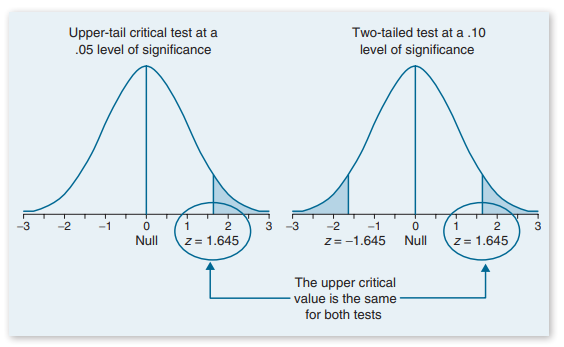
A shown in Figure, these are similar tests, except in the upper-tail test, all 
the alpha level is placed in the upper tail, and in the two-tailed test, the alpha level is 
split so that .05 is placed in each tail.
- The two-tailed test is more conservative; it makes it more difficult to reject the 
null hypothesis. It also eliminates the possibility of committing a Type III error.
- The one-tailed test, though, is associated with greater power. If the value stated in 
the null hypothesis is false, then a one-tailed test will make it easier to detect this 
(i.e., lead to a decision to reject the null hypothesis). Because the one-tailed test 
makes it easier to reject the null hypothesis, it is important that we justify that an 
outcome can occur in only one direction. 
- sis, it is important that we justify that an 
outcome can occur in only one direction. Justifying that an outcome can occur in 
only one direction is difficult for much of the data that behavioral researchers measure. For this reason, most studies in behavioral research are two-tailed test
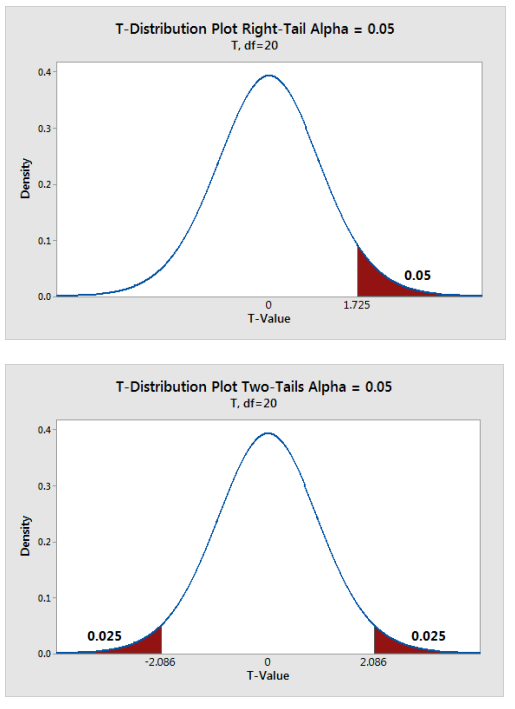
- As you can see, the one-tailed test requires a less extreme t-value 
(1.725) to produce a statistically significant result in the right tail than 
the two-tailed test (2.086). In other words, a smaller effect is statistically significant in the one-tailed analysis
- To understand why this occurs, keep in mind that the critical regions 
also represent where the Type I errors occur. For a two-tailed test, 
these errors are split equally between the left and right tails. However, 
for a one-tailed test, all these errors arise specifically in the one direction that you are interested in. Unfortunately, the error rate doubles 
in that direction compared to a two-tailed test. In the graphs above, 
the right tail has an error rate of 5% in the one-tailed test compared to 2.5% in the two-tailed test
- For some tests, you need to choose between the one-tailed and twotailed versions. When you need to decide, follow these guidelines. If the effect can occur in:
• One direction: Use a one-tailed test and choose the correct alternative hypothesis.
• Both directions: Use a two-tailed test.
• Both directions, but you care about only one direction and 
you need the higher statistical power: Use a two-tailed test 
and double the significance level. Be aware that you are doubling the probability of a false positive

# Measuring The Size Of An Effect: Cohen’S D
<a id='effectsize'></a>
- A decision to **reject the null hypothesis** means that an effect is significant. For a one-sample test, an **effect** is the difference between a sample mean and the population mean stated in the null hypothesis.
- For a single sample, an **effect** is the difference between a sample mean and the population mean stated in the null hypothesis. In hypothesis testing, an effect is insignificant when we retain the null hypothesis; an effect is significant when we reject the null hypothesis
- **Effect size** is a statistical measure of the size of an effect in a population, which allows researchers to describe how far scores shifted in the population, or the percent of variance that can be explained by a given variable.
- **Cohen’s d** measures the number of standard deviations an effect shifted above or below the population mean stated by the null hypothesis. The formula for Cohen’s d replaces the standard error in the denominator of the test statistic with the population standard deviation
- A 27-point effect shifted the 
distribution of scores in the 
population by 0.19 standard 
deviations
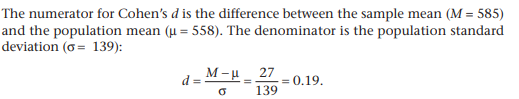
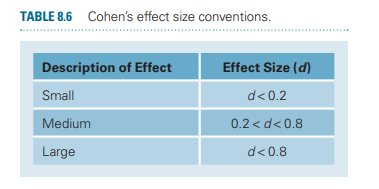
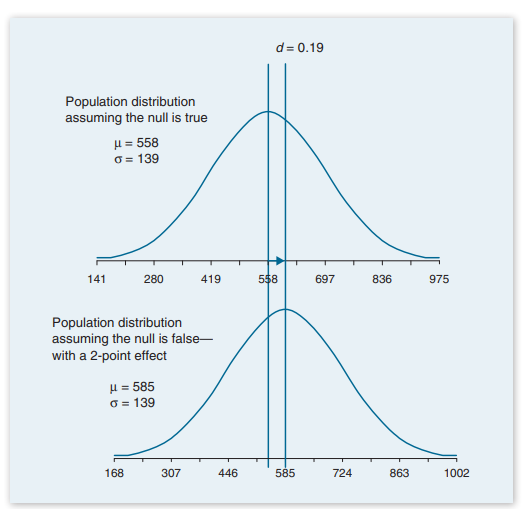
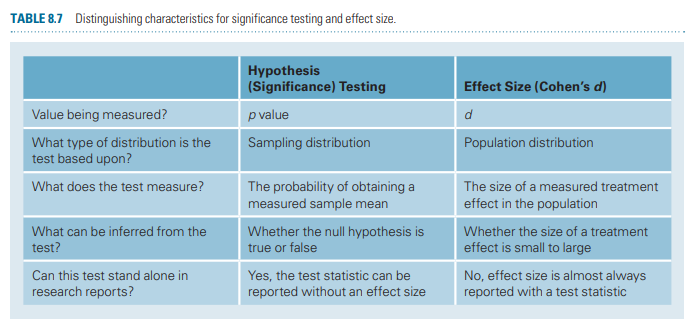

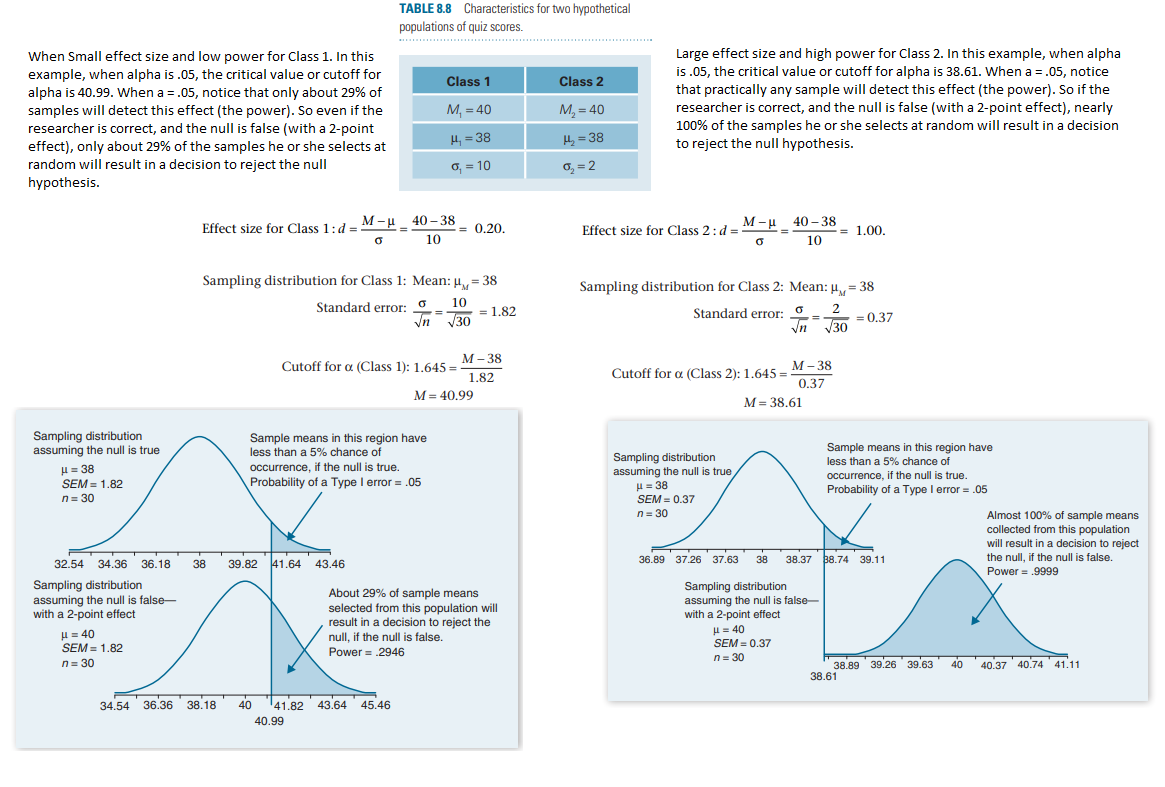

- If the null hypothesis is true, then the sampling distribution of the mean for 
alpha (a), the type of error associated with a true null hypothesis, will have a mean 
equal to 38. We can now determine the smallest value of the sample mean that is 
the cutoff for the rejection region, where we decide to reject that the true population 
mean is 38.
- For an upper-tail critical test using a .05 level of significance, the critical value is 1.645. We can use this value to compute a z transformation to determine what sample mean value is 1.645 standard deviations above 38 in a sampling distribution for samples of size 30
- If we obtain a sample mean equal to 40.99 or higher in Class 1, then we will reject the null hypothesis. If we obtain a sample mean equal to 38.61 or higher in Class 2, then we will reject the null hypothesis. To determine the power for this test, we assume that the sample mean we selected (M = 40) is the true population mean—we are therefore assuming that the null hypothesis is false. We are asking the following question: If we are correct and there is a 2-point effect, then what is the probability that we will detect the effect? In other words, what is the probability that a sample randomly selected from this population will lead to a decision to reject the null hypothesis?
- If the null hypothesis is false, then the sampling distribution of the mean for b, the type of error associated with a false null hypothesis, will have a mean equal to 40. This is what we believe is the true population mean, and this is the only change; we do not change the standard error. 
- Class 1 has a small effect size (d = .20). Even if 
we are correct, and a 2-point effect does exist in this population, then of all the 
samples of size 30 we could select from this population, only about 29% (power = 
.2946) of those samples will show the effect (i.e., lead to a decision to reject the 
null). The probability of correctly rejecting the null hypothesis (power) is low.
- Class 2 has a large effect size (d = 1.00). If we are correct, and a 2-point effect 
does exist in this population, then of all the samples of size 30 we could select from 
this population, nearly 100% (power = .9999) of those samples will show the effect 
(i.e., lead to a decision to reject the null hypothesis). Hence, we have more power to 
detect an effect in this population, and correctly reject the null hypothesis

# Test for 1 sample population proportion<a id='1P'></a>
- Assumptions for proportions:
     - Observations in each sample are independent and identically distributed (iid). 
     - The outcome of one trial does not influence the outcome of another trial.
     - The proportion remains constant over time. If there is a chance the probability can change over time, you can use the P chart (a control chart) to confirm this assumption.
     - Your data must be Binary. There are only two possible outcomes per trial.
- Interpretation for proportions:  
     - Null hypothesis: The population proportion equals the hypothesized proportion.
     - Alternative hypothesis: The population proportion does not equal the hypothesized proportion.

A beverage company is creating a drink that will directly compete 
with a similar drink from another company. The company's goal is for 
70% of the population to prefer their drink over the competitor's beverage. The company sets up a blind taste test and randomly selects 100 
participants. In the study, 80% of the tasters prefer the company’s 
drink

#### Way 1

In [7]:
# count: the number of successes in nobs trials.
#nobs: the number of trials or observations, with the same length as count.
#value: the hypothesized population proportion.
# alternative: The alternative hypothesis.  
from statsmodels.stats.proportion import proportions_ztest
# 
# perform one proportion z-test
proportions_ztest(count=80, nobs=100, value=0.70, alternative='two-sided')

(2.500000000000002, 0.012419330651552192)

#### Way 2
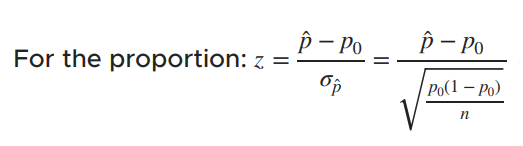

In [24]:
# p: observed sample proportion
#p0: hypothesized population proportion
#n: sample size
import math
p = 0.7
p_0 = 0.8
n = 100
a = (p-p_0)
b = p_0*(1-p_0)/n
se = a/math.sqrt(b)
print(se)

-2.500000000000002


In [14]:
scipy.stats.norm.sf(abs(z))*2

0.012419330651552192

#### z score to p value

In [15]:
# Left tailed or Lower tailed test
scipy.stats.norm.sf(abs(-0.67))
# Right tailed or upper tailed test
scipy.stats.norm.sf(abs(1.67))
# 2 sided
scipy.stats.norm.sf(abs(z))*2

0.012419330651552192

#### Way 3
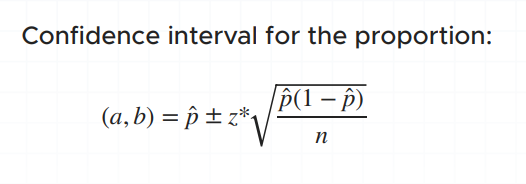

In [31]:
import scipy.stats 
def proportion_confidence_interval(p_sample, n, confidence=0.95):
    x= ((p_sample*(1-p_sample))/n)
    se= np.sqrt(x)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return p_sample-h, p_sample+h

In [32]:
proportion_confidence_interval(p_sample=0.80, n=100, confidence=0.95)

(0.7206313219396527, 0.8793686780603474)

In [22]:
from statsmodels.stats.proportion import proportion_confint
ci_low, ci_upp = proportion_confint(count=80, nobs=100, alpha=0.05, method='normal')

In [23]:
ci_low, ci_upp 

(0.7216014406183978, 0.8783985593816023)

The confidence interval indicates the proportion 
of the population that prefers the company's beverage is likely between ~0.71 and 0.87. This confidence interval excludes the null hypothesis value of 0.7, which is consistent with the statistically 
significant p-value

# Test for 2 sample population proportion
<a id='2P'></a>
- Null hypothesis: The proportions for the two populations are equal.
- Alternative hypothesis: The proportions for the two populations are not equal.

- Assumptions:For reliable 2-sample Proportions test results, your data should satisfy the following assumptions:
1. Random sample
2. Binary data
3. Independent groups
4. Each trial is independent
5. The proportions remain constant over time

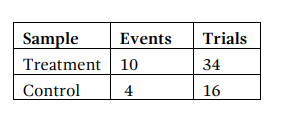

In [3]:
p1= 10/34
p2= 4/16
print(p1)
print(p2)
print(p1-p2)

0.29411764705882354
0.25
0.04411764705882354


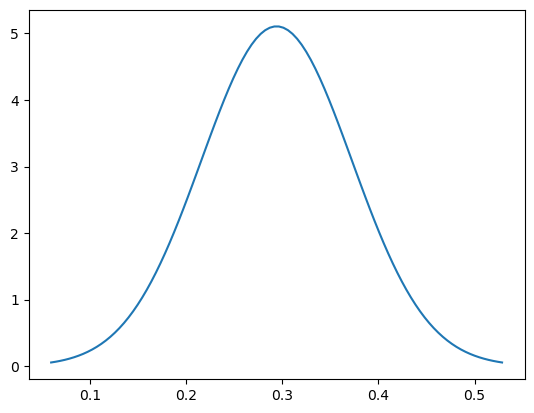

In [9]:
# Sampling distribution of sample proportion for treatment
import math
import numpy as np
import seaborn as sns
from scipy.stats import bernoulli, norm
n=34
mu = p1
variance = p1*(1-p1)/n
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.lineplot(x = x, y = norm.pdf(x, mu, sigma));

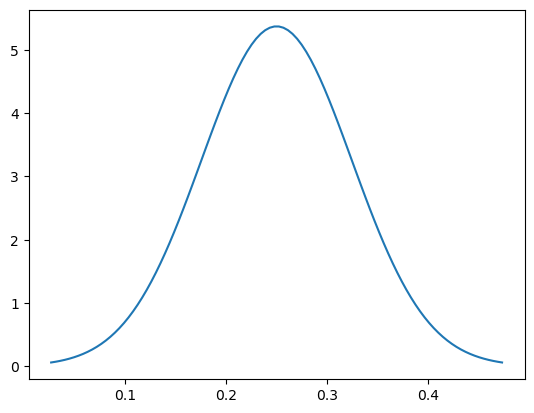

In [10]:
# Sampling distribution of sample proportion for women
n2=16
mu = p2
variance = p2*(1-p2)/n
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.lineplot(x = x, y = norm.pdf(x, mu, sigma));

- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

#### Way 1

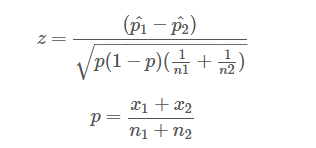

In [1]:
import numpy as np
import scipy.stats.distributions as dist

def z_test_2_sample_proportions(x1, x2, n1, n2, two_tailed=True):
    '''
    Calculate the test statistic for a z-test on 2 proportions from independent samples
    x1, x2: number of successes in group 1 and 2
    n1, n2: total number of observations in group 1 and 2
    Returns: test statistic (z), and p-value 
    '''
    avg_p = (x1 + x2) / (n1 + n2)
    z_val = (x1/n1 - x2/n2) / np.sqrt(avg_p * (1-avg_p) * (1/n1 + 1/n2))
    z_prob = dist.norm.cdf(-np.abs(z_val))

    if two_tailed:
        return z_val, 2*z_prob

    else:
        return z_val, z_prob

In [2]:
z_test_2_sample_proportions(x1=10, x2=4, n1=34, n2=16, two_tailed=True)

(0.32410186177608225, 0.7458609174504707)

#### Way 2

In [3]:
p1= 10/34
p2= 4/16
print(p1)
print(p2)
print(p1-p2)

0.29411764705882354
0.25
0.04411764705882354


In [7]:
# count: the number of successes in nobs trials.
#nobs: the number of trials or observations, with the same length as count.
#value: the hypothesized population proportion.
# alternative: The alternative hypothesis.  
from statsmodels.stats.proportion import proportions_ztest
sample_success_a, sample_size_a = (10, 34)
sample_success_b, sample_size_b = (4, 16)


successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])
# perform one proportion z-test
proportions_ztest(count=successes, nobs=samples, alternative='two-sided')

(0.32410186177608225, 0.7458609174504707)

We fail to reject the null hypothesis. 

#### Way 3

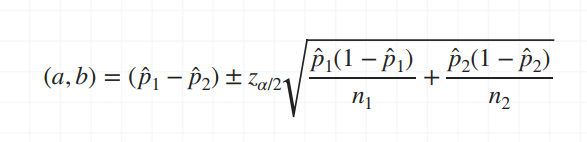

In [7]:
import scipy.stats 
def proportion_confidence_interval(p1, p2, n1, n2, confidence=0.95):
    x= ((p1*(1-p1))/n1) + ((p2*(1-p2))/n2)
    se= np.sqrt(x)
    sl= 1- confidence
    h = se * scipy.stats.norm.ppf(1-sl/2) # 1.96=the z-critical value based on the confidence level
    return p1-p2, p1-p2-h, p1-p2+h

In [19]:
# Determine the z-critical value in a two-tailed test, sl= 1- 99% confidence interval
sl= 0.01
scipy.stats.norm.ppf(1-sl/2)
# Determine the z-critical value in a right-tailed test
scipy.stats.norm.ppf(1-sl)
# Determine the z-critical value in a left-tailed test
scipy.stats.norm.ppf(sl)

-2.3263478740408408

In [18]:
proportion_confidence_interval(p1= (10/34), p2= (4/16), n1=34, n2=16, confidence=0.95)

(0.04411764705882354, -0.2175577216559601, 0.3057930157736072)

Interval contains 0 so we fail to reject the null hypothesis

# One-Sample and Two-Independent Sample t Tests

- The t statistic, known as t 
observed or t obtained, is 
an inferential statistic used to 
determine the number of standard 
deviations in a t distribution that 
a sample mean deviates from the 
mean value or mean difference 
stated in the null hypothesis.
- The difference is that the t distribution 
has greater variability in the tails because the sample variance is not always 
equal to the population variance. Sometimes the estimate for variance is too 
large; sometimes the estimate is too small. This leads to a larger probability 
of obtaining sample means farther from the population mean. Otherwise, 
the t distribution shares all the same characteristics as the normal distribution: It is symmetrical and asymptotic, and its mean, median, and mode are 
all located at the center of the distribution.
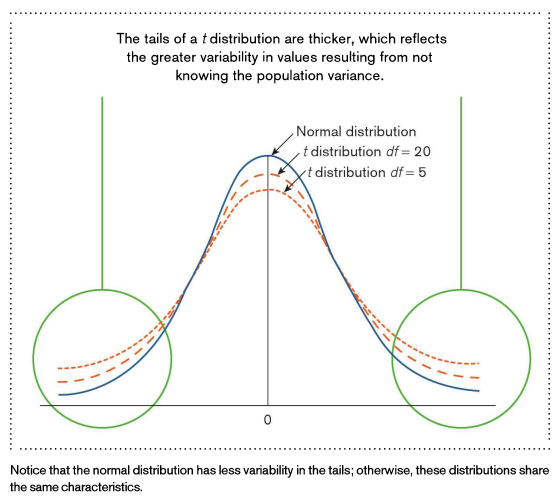


# 1 sample t test
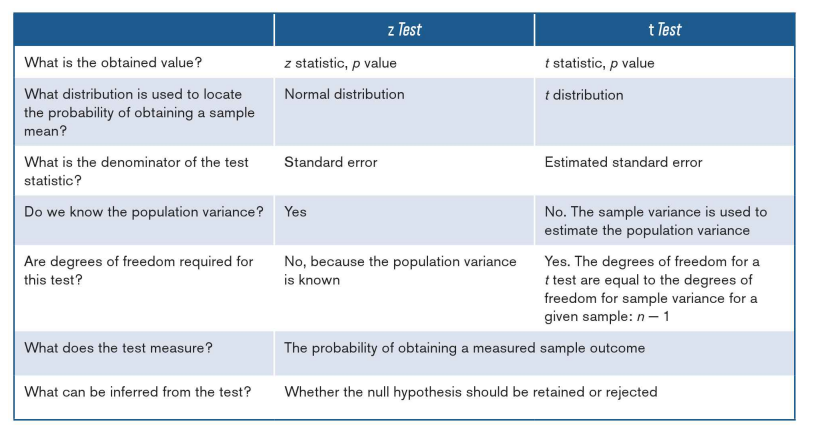

#### The critical t value from apha (q level)

In [22]:
# Importing the library
# The critical t value from apha (q level)
import scipy.stats

# Determine p-value in a two-tailed test
print(scipy.stats.t.ppf(q=1-0.05/2,df=8)) # +-2.30

# Determine p-value in right-tailed test
print(scipy.stats.t.ppf(q=1-.05,df=8))

# Determine p-value for the left-tailed test
print(scipy.stats.t.ppf(q=.10,df=34))

2.3060041350333704
1.8595480375228424
-1.30695158562383


In [19]:
# Importing the library
# The p value from t statsitic
import scipy.stats

# Determine p-value in a two-tailed test
print(scipy.stats.t.sf(abs(3), df=8)*2)

# Determine p-value in right-tailed test
print(scipy.stats.t.sf(abs(-0.99), df=8))

# Determine p-value for the left-tailed test
print(scipy.stats.t.sf(abs(-.47), df=12))

0.017071681233782634
0.17558421797297666
0.3233906798700002


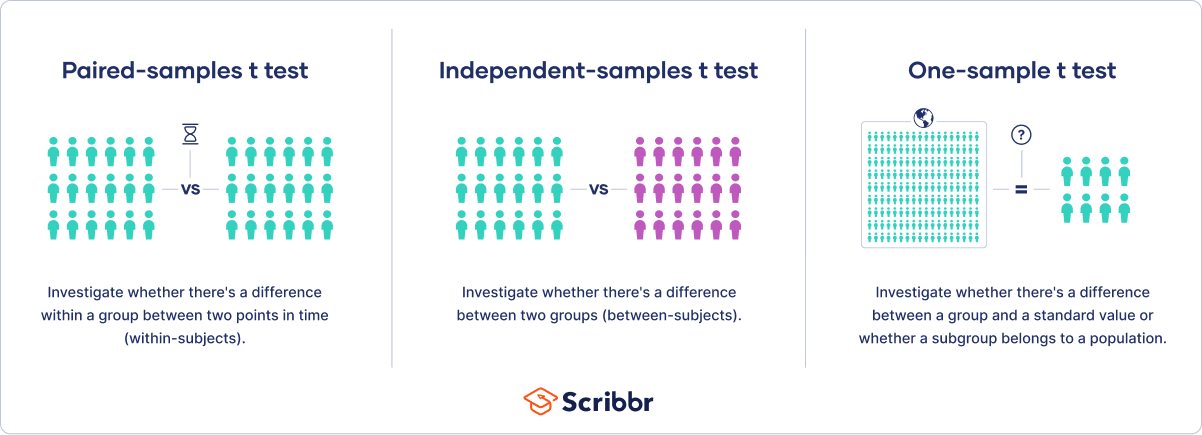

In [29]:
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

NameError: name 'np' is not defined

#### 1. Step 1:Formulate hypothesis

If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be? 

**Since there is no directional component associated with this statement, a not equal to seems most reasonable.**

$$H_0: \mu_{coff} - \mu_{no} = 0$$


$$H_1: \mu_{coff} - \mu_{no} \neq 0$$


**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample. You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.

In [60]:
nocoff_means, coff_means, diffs = [], [], []

for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    nocoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    # append the info 
    coff_means.append(coff_mean)
    nocoff_means.append(nocoff_mean)
    diffs.append(coff_mean - nocoff_mean)   

In [61]:
np.std(nocoff_means) # the standard deviation of the sampling distribution for nocoff

0.40512631277475286

In [62]:
np.std(coff_means) # the standard deviation of the sampling distribution for coff

0.24073763373473006

In [63]:
np.std(diffs) # the standard deviation for the sampling distribution for difference in means

0.4698091074387149

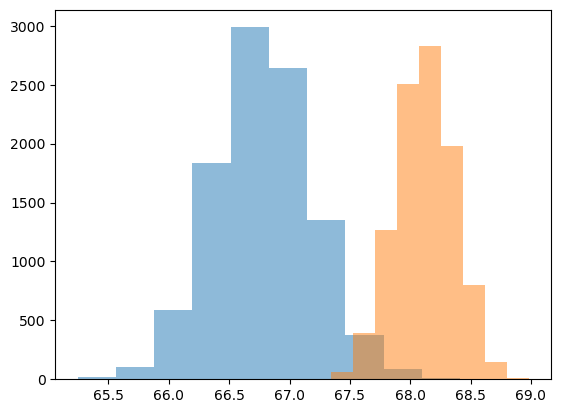

In [64]:
plt.hist(nocoff_means, alpha = 0.5);
plt.hist(coff_means, alpha = 0.5); # They look pretty normal to me!

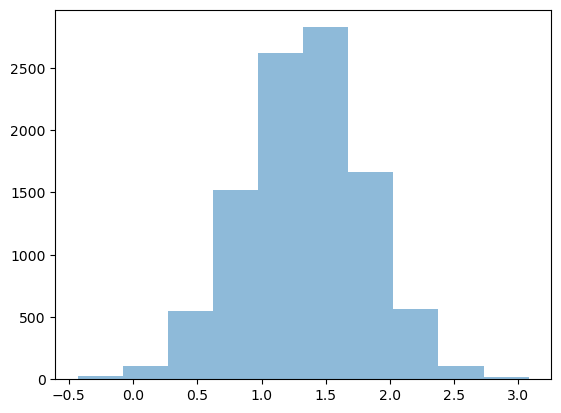

In [40]:
plt.hist(diffs, alpha = 0.5); # again normal - this is by the central limit theorem

In [65]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(diffs), 10000) # Here are 10000 draws from the sampling distribution under the null

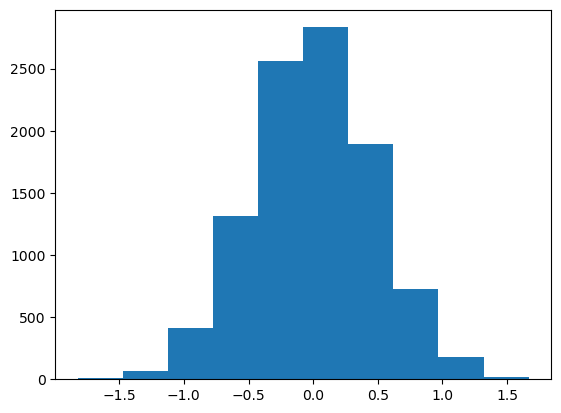

In [66]:
plt.hist(null_vals); #Here is the sampling distribution of the difference under the null

# Goodness-of-Fit for a Poisson Distribution <a id='POISSONGOOD'></a>
- H0: The sample data follow the Poisson distribution.
- H1: The sample data do not follow the Poisson distribution
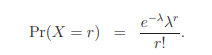

In [73]:
import pandas as pd
store=pd.read_csv('DiscreteGOF.csv')

In [74]:
store.head()

Accidents   Color  OurState  Global Proportions
0          2   White     120.0                0.22
1          0  Silver     114.0                0.20
2          2   Black      92.0                0.19
3          2    Gray      86.0                0.12
4          4     Red      34.0                0.09

In [75]:
store['Accidents'].mean()

2.24

# Calculating Mean

In [78]:
newstore=store['Accidents'].value_counts().to_frame().reset_index()
newstore.rename(columns= {'index': 'Accidents', 'Accidents': 'Observed_frequency'}, inplace=True )
newstore

Accidents  Observed_frequency
0          2                  13
1          4                  12
2          3                  10
3          1                   8
4          0                   7

In [79]:
newstore['newcol']= newstore['Accidents'] * newstore['Observed_frequency']
newstore.sort_values(by= 'Accidents', inplace=True)
newstore

Accidents  Observed_frequency  newcol
4          0                   7       0
3          1                   8       8
0          2                  13      26
2          3                  10      30
1          4                  12      48

In [80]:
lambda_estimate= newstore['newcol'].sum()/newstore['Observed_frequency'].sum()
lambda_estimate

2.24

In [81]:
newstore['Observed_frequency'].sum()

50

In [88]:
last_value= 1- (poisson.pmf(k=0, mu=2.24)+ poisson.pmf(k=1, mu=2.24) + poisson.pmf(k=2, mu=2.24) +poisson.pmf(k=3, mu=2.24))
last_value

0.18856930517050485

In [83]:
poisson.pmf(k=4, mu=2.24)

0.11167634511826605

In [89]:
import numpy as np
from scipy.stats import poisson
newstore['expected_prob']=np.array([poisson.pmf(k=0, mu=2.24), poisson.pmf(k=1, mu=2.24), poisson.pmf(k=2, mu=2.24), poisson.pmf(k=3, mu=2.24), last_value])

In [90]:
newstore

Accidents  Observed_frequency  newcol  expected_prob
4          0                   7       0       0.106459
3          1                   8       8       0.238467
0          2                  13      26       0.267083
2          3                  10      30       0.199422
1          4                  12      48       0.188569

In [91]:
newstore['expected_freq']= newstore['expected_prob']*newstore['Observed_frequency'].sum()
newstore

Accidents  Observed_frequency  newcol  expected_prob  expected_freq
4          0                   7       0       0.106459       5.322925
3          1                   8       8       0.238467      11.923352
0          2                  13      26       0.267083      13.354155
2          3                  10      30       0.199422       9.971102
1          4                  12      48       0.188569       9.428465

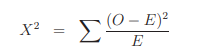
For the χ
2
test to be valid, the expected frequencies must be at least 5

In [92]:
newstore['chi']= ((newstore['Observed_frequency']- newstore['expected_freq'])**2)/newstore['expected_freq']
newstore

Accidents  Observed_frequency  newcol  expected_prob  expected_freq  \
4          0                   7       0       0.106459       5.322925   
3          1                   8       8       0.238467      11.923352   
0          2                  13      26       0.267083      13.354155   
2          3                  10      30       0.199422       9.971102   
1          4                  12      48       0.188569       9.428465   

        chi  
4  0.528390  
3  1.290970  
0  0.009392  
2  0.000084  
1  0.701365

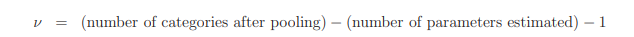

In [95]:
chi_statsitic= newstore['chi'].sum()
dof= newstore['Accidents'].count()- 1-1
chi_statsitic

2.5302007649235296

In [96]:
from scipy.stats.distributions import chi2
chi2.sf(chi_statsitic,dof)

0.4698578450324272

In [97]:
import scipy as sp
p = 1 - sp.stats.chi2.cdf(chi_statsitic,dof)
p

0.4698578450324272

The p-value is larger than the common significance level of 0.05. Consequently, the test result suggests that these data follow the Poisson 
distribution. 

# One-Sample Poisson Rate Test <a id='1POISSON'></a>
- Null hypothesis: The population rate equals the hypothesized rate.
- Alternative hypothesis: The population rate does not equal 
the hypothesized rate

1. The data are counts (discrete)  
2. The sample is a simple random sample from its population.
3. Data must be counts per a fixed observation unit
4. Each trial is independent. The count for one observation unit doesn’t affect the count for the next unit.

In [4]:
import pandas as pd
store=pd.read_csv('CountDataExamples.csv')
store.head()

Falls  Store 1  Store 2
0      2      1.0      1.0
1      0      7.0     10.0
2      2      3.0      4.0
3      2      4.0      2.0
4      4      4.0      0.0

The inspector needs to compare the mean sample rate of occurrence 
(2.24) to a reference value of 1.75.

In [5]:
store['Falls'].mean()

2.24

In [17]:
from scipy.stats import poisson # Probability Equal to Some Value
poisson.pmf(k=2.24, mu=1.75)

0.24120437680537815

In [18]:
poisson.cdf(k=2.24, mu=1.75) #Probability Less than Some Value

0.7439696953972181

In [22]:
1- poisson.cdf(k=2.24, mu=1.75) #Probability Greater than Some Value

0.25603030460278187

#### Way1:
For Poisson, the mean and the variance are both lambda (λ).
The standard error is calculated as: sqrt(λ /n) where λ is Poisson mean and n is sample size or total exposure (total person years, total time observed,…)

In [27]:
import scipy.stats 
def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data)
    n = len(a)
    lambda_estimate= a.mean()
    se = np.sqrt(lambda_estimate/n)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return lambda_estimate, lambda_estimate-h, lambda_estimate+h

In [28]:
mean_confidence_interval(data=store['Falls'], confidence=0.95)

(2.24, 1.8146530950933797, 2.6653469049066207)

#### Way 2:
The confidence interval for event X is calculated as: 

           `(qchisq(α/2, 2*x)/2, qchisq(1-α/2, 2*(x+1))/2 )`

Where x= n*λ is the number of events occurred under Poisson distribution.

In [35]:
def poisson_interval(x, alpha=0.05): 
    """
    uses chisquared info to get the poisson interval. Uses scipy.stats 
    (imports in function). 
    """
    from scipy.stats import chi2
    a = alpha
    low, high = (chi2.ppf(a/2, 2*x) / 2, chi2.ppf(1-a/2, 2*x + 2) / 2)
    if x == 0: 
        low = 0.0
    return low, high

In [37]:
l,h= poisson_interval(x=2.24*50, alpha=0.05)

In [38]:
l/50, h/50

(1.8444090706511682, 2.695302065842708)

This range excludes the reference value 1.75, which is why the result is statistically 
significant. 

# Two-Sample Poisson Rate Test <a id='2POISSON'></a>
- Null hypothesis: The rates for the two populations are equal.
- Alternative hypothesis: The rates for the two populations are not equal
- Assumptions:For reliable 2-sample Poisson rate test results, your data should satisfy the following assumptions:
  - Random sample
  - Data must be counts per a fixed unit
  - Each trial is independent. The count for one observation unit doesn’t affect the count for the next unit.
  - Independent groups. Different items or people in each group.

Suppose an analyst wants to compare the number of customer complaints at two store locations. The analyst counts the number of complaints during a business day for a random sample of 30 days.

In [14]:
store.head()

Falls  Store 1  Store 2
0      2      1.0      1.0
1      0      7.0     10.0
2      2      3.0      4.0
3      2      4.0      2.0
4      4      4.0      0.0

In [39]:
store['Store 1'].mean()-store['Store 2'].mean()

-1.7999999999999994

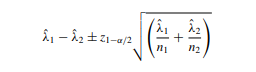
when n1=n2

In [55]:
import scipy.stats 
def mean_confidence_interval(x, y, sl=0.05):
    n1 = len(x)
    n2 = len(y)
    lambda_1= x.mean()
    lambda_2= y.mean()
    se = np.sqrt((lambda_1/n1)+ (lambda_2/n2))
    h = se * stats.norm.ppf(1 - sl/2)
    return lambda_1-lambda_2, lambda_1-lambda_2-h, lambda_1-lambda_2+h

Furthermore, the confidence interval estimates that the actual population difference between these two stores is between approximately 
-2.9 and -0.7. The negative values reflect the fact that Store 1 has a 
lower rate than Store 2 (i.e., Store 1 – Store 2 < 0). The confidence 
interval excludes the value of zero (no difference between groups), 
so we can conclude that the population rates are different.

In [56]:
mean_confidence_interval(x= store['Store 1'], y= store['Store 2'], sl=0.05)

(-1.7999999999999994, -2.6284567838038884, -0.9715432161961105)

In [57]:
from scipy import stats
stats.norm.ppf(1 - 0.05/2)

1.959963984540054

# Chi-Squared Goodness-Of-Fit Test <a id='CHIGOOD'></a>
- Null: The sample data follow the hypothesized distribution.
- Alternative: The sample data do not follow the hypothesized 
distribution

In [10]:
import pandas as pd
store=pd.read_csv('DiscreteGOF.csv')

In [11]:
store.drop(labels= 'Accidents',axis=1, inplace=True)
store.dropna(inplace=True)

In [12]:
store

Color  OurState  Global Proportions
0   White     120.0                0.22
1  Silver     114.0                0.20
2   Black      92.0                0.19
3    Gray      86.0                0.12
4     Red      34.0                0.09
5   Brown      33.0                0.08
6    Blue      47.0                0.07
7   Green      11.0                0.02
8   Other       2.0                0.01

In [13]:
store['Global Proportions']= store['Global Proportions']*store['OurState'].sum()
store

Color  OurState  Global Proportions
0   White     120.0              118.58
1  Silver     114.0              107.80
2   Black      92.0              102.41
3    Gray      86.0               64.68
4     Red      34.0               48.51
5   Brown      33.0               43.12
6    Blue      47.0               37.73
7   Green      11.0               10.78
8   Other       2.0                5.39

In [14]:
# determining chi square goodness of fit using formula

observed= store['OurState']
expected= store['Global Proportions']
chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

19.588746772762008


In [15]:
import scipy.stats as stats

#perform Chi-Square Goodness of Fit Test
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 8)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=8)
print("P value")
print(p_value)

Critical value
15.50731305586545
P value
0.01200913508950574


In [16]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Power_divergenceResult(statistic=19.588746772762008, pvalue=0.012009135089505714)

Since our chi-squared statistic exceeds the critical value, we'd reject the null hypothesis that the two distributions are the same.